# Imports


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif



# Preprocessing

In [ ]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

In [ ]:
train = train_transaction.merge(train_identity, on='TransactionID', how='left')
test = test_transaction.merge(test_identity, on='TransactionID', how='left')

In [ ]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Rows, Cols = train.shape
print("Number of Row in Data = ", Rows)
print("Number of Columns in Data = ", Cols)

Number of Row in Data =  71381
Number of Columns in Data =  434


In [ ]:
Rows, Cols = test.shape
print("Number of Row in Data = ", Rows)
print("Number of Columns in Data = ", Cols)

Number of Row in Data =  60773
Number of Columns in Data =  433


In [ ]:
train.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,45922
id_37,45922
id_38,45922
DeviceType,45930


In [ ]:
test.isnull().sum()

,0
TransactionID,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
...,...
id-36,50042
id-37,50042
id-38,50042
DeviceType,50057


In [ ]:
import pandas as pd
import numpy as np


# Step 1: Identify column types
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in train.columns if train[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
train.drop(columns=drop_cols, inplace=True)

# Step 3: Fill missing values in categorical columns with mode
for col in categorical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)

# Step 4: Fill missing values in numerical columns with mean
for col in numerical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mean_val = train[col].mean()
        train[col] = train[col].fillna(mean_val)

# Step 5: Just in case any values remain
train = train.fillna("unknown")

# Final check
print("✅ Missing values after processing:")
print(train.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D7', 'D12', 'D13', 'D14', 'id_07', 'id_08', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']
✅ Missing values after processing:
0 missing values remaining.


In [ ]:
import pandas as pd
import numpy as np


# Step 1: Identify column types
categorical_cols = test.select_dtypes(include=['object']).columns.tolist()
numerical_cols = test.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in test.columns if test[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
test.drop(columns=drop_cols, inplace=True)

# Step 3: Fill missing values in categorical columns with mode
for col in categorical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mode_val = test[col].mode()[0]
        test[col] = test[col].fillna(mode_val)

# Step 4: Fill missing values in numerical columns with mean
for col in numerical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mean_val = test[col].mean()
        test[col] = test[col].fillna(mean_val)

# Step 5: Just in case any values remain
test = test.fillna("unknown")

# Final check
print("✅ Missing values after processing:")
print(test.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D7', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id-03', 'id-04', 'id-07', 'id-08', 'id-14', 'id-18', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-30', 'id-32', 'id-33', 'id-34']
✅ Missing values after processing:
0 missing values remaining.


In [ ]:
train.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,0
id_37,0
id_38,0
DeviceType,0


In [ ]:
test.isnull().sum()

,0
TransactionID,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
card1,0
...,...
id-36,0
id-37,0
id-38,0
DeviceType,0


In [ ]:
train.dtypes

,0
TransactionID,int64
isFraud,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
...,...
id_36,object
id_37,object
id_38,object
DeviceType,object


In [ ]:
test.dtypes

,0
TransactionID,int64
TransactionDT,int64
TransactionAmt,float64
ProductCD,object
card1,int64
...,...
id-36,object
id-37,object
id-38,object
DeviceType,object


In [ ]:
categorical_columns1 = train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns1)

Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()
for col in categorical_columns1:
    train[col] = label_encoder.fit_transform(train[col])

In [ ]:
categorical_columns2 = test.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns2)

Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id-12', 'id-15',
       'id-16', 'id-28', 'id-29', 'id-31', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()
for col in categorical_columns2:
    test[col] = label_encoder.fit_transform(test[col])

In [ ]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,4,13926,368.164867,150.0,1,142.0,...,35,26.484549,46,3,1,0,1,1,0,649
1,2987001,0,86401,29.0,4,2755,404.000000,150.0,2,102.0,...,35,26.484549,46,3,1,0,1,1,0,649
2,2987002,0,86469,59.0,4,4663,490.000000,150.0,3,166.0,...,35,26.484549,46,3,1,0,1,1,0,649
3,2987003,0,86499,50.0,4,18132,567.000000,150.0,2,117.0,...,35,26.484549,46,3,1,0,1,1,0,649
4,2987004,0,86506,50.0,1,4497,514.000000,150.0,2,102.0,...,76,32.000000,61,3,1,0,1,1,1,359


In [ ]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,4,10409,111.0,150.0,3,226.0,1,...,412.301806,0,0,38,0,0,1,0,0,539
1,3663550,18403263,49.00,4,4272,111.0,150.0,3,226.0,1,...,412.301806,0,0,38,0,0,1,0,0,539
2,3663551,18403310,171.00,4,4476,574.0,150.0,3,226.0,1,...,412.301806,0,0,38,0,0,1,0,0,539
3,3663552,18403310,284.95,4,10989,360.0,150.0,3,166.0,1,...,412.301806,0,0,38,0,0,1,0,0,539
4,3663553,18403317,67.95,4,18018,452.0,150.0,2,117.0,1,...,412.301806,0,0,38,0,0,1,0,0,539


In [ ]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,7.138100e+04,71381.000000,7.138100e+04,71381.000000,71381.000000,71381.000000,71381.000000,71381.000000,71381.000000,71381.000000,...,71381.000000,71381.000000,71381.000000,71381.00000,71381.000000,71381.000000,71381.000000,71381.000000,71381.000000,71381.000000
mean,3.022690e+06,0.026828,8.631209e+05,126.983474,2.898881,9902.680811,368.164867,152.935260,2.592118,200.567567,...,39.705020,26.484549,44.837114,2.94032,0.904512,0.027318,0.921954,0.930514,0.118015,624.604713
std,2.060606e+04,0.161581,4.427797e+05,205.602162,1.508657,4920.449832,158.054570,10.748251,0.648095,40.443951,...,10.617611,1.902085,10.078952,0.24406,0.293889,0.163010,0.268246,0.254281,0.322628,103.979166
min,2.987000e+06,0.000000,8.640000e+04,0.292000,0.000000,1001.000000,100.000000,100.000000,0.000000,100.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.004845e+06,0.000000,4.873910e+05,42.950000,1.000000,6019.000000,215.000000,150.000000,2.000000,166.000000,...,35.000000,26.484549,46.000000,3.00000,1.000000,0.000000,1.000000,1.000000,0.000000,649.000000
50%,3.022690e+06,0.000000,8.664870e+05,70.000000,4.000000,9744.000000,369.000000,150.000000,3.000000,226.000000,...,35.000000,26.484549,46.000000,3.00000,1.000000,0.000000,1.000000,1.000000,0.000000,649.000000
75%,3.040535e+06,0.000000,1.266605e+06,125.000000,4.000000,14276.000000,514.000000,150.000000,3.000000,226.000000,...,36.000000,26.484549,46.000000,3.00000,1.000000,0.000000,1.000000,1.000000,0.000000,649.000000
max,3.058380e+06,1.000000,1.609878e+06,4829.950000,4.000000,18395.000000,600.000000,229.000000,3.000000,237.000000,...,78.000000,32.000000,103.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,732.000000


In [ ]:
test.describe()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-20,id-28,id-29,id-31,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
count,6.077300e+04,6.077300e+04,60773.000000,60773.000000,60773.000000,60773.000000,60773.000000,60773.000000,60773.000000,60773.000000,...,60773.000000,60773.000000,60773.000000,60773.000000,60773.000000,60773.000000,60773.00000,60773.000000,60773.000000,60773.000000
mean,3.693935e+06,1.942452e+07,141.878317,3.443108,9930.127474,360.260452,152.193957,2.639396,200.535445,0.778504,...,412.301806,0.074095,0.074885,40.131440,0.084758,0.005134,0.95962,0.047603,0.082240,525.780955
std,1.754380e+04,5.948552e+05,250.540607,1.265726,4857.785781,156.622771,10.436784,0.549444,40.634784,0.415257,...,66.711945,0.261928,0.263208,8.908218,0.278524,0.071467,0.19685,0.212927,0.274733,67.907978
min,3.663549e+06,1.840322e+07,0.246000,0.000000,1006.000000,100.000000,100.000000,0.000000,100.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.678742e+06,1.889809e+07,45.950000,4.000000,6053.000000,206.000000,150.000000,2.000000,166.000000,1.000000,...,412.301806,0.000000,0.000000,38.000000,0.000000,0.000000,1.00000,0.000000,0.000000,539.000000
50%,3.693935e+06,1.942980e+07,73.000000,4.000000,9749.000000,360.260452,150.000000,3.000000,226.000000,1.000000,...,412.301806,0.000000,0.000000,38.000000,0.000000,0.000000,1.00000,0.000000,0.000000,539.000000
75%,3.709128e+06,1.993494e+07,134.950000,4.000000,14099.000000,512.000000,150.000000,3.000000,226.000000,1.000000,...,412.301806,0.000000,0.000000,38.000000,0.000000,0.000000,1.00000,0.000000,0.000000,539.000000
max,3.724321e+06,2.046733e+07,7777.490000,4.000000,18396.000000,600.000000,232.000000,3.000000,237.000000,1.000000,...,657.000000,1.000000,1.000000,92.000000,1.000000,1.000000,1.00000,1.000000,1.000000,596.000000


In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
test.duplicated().sum()

np.int64(0)

# EDA , Univariate Analysis

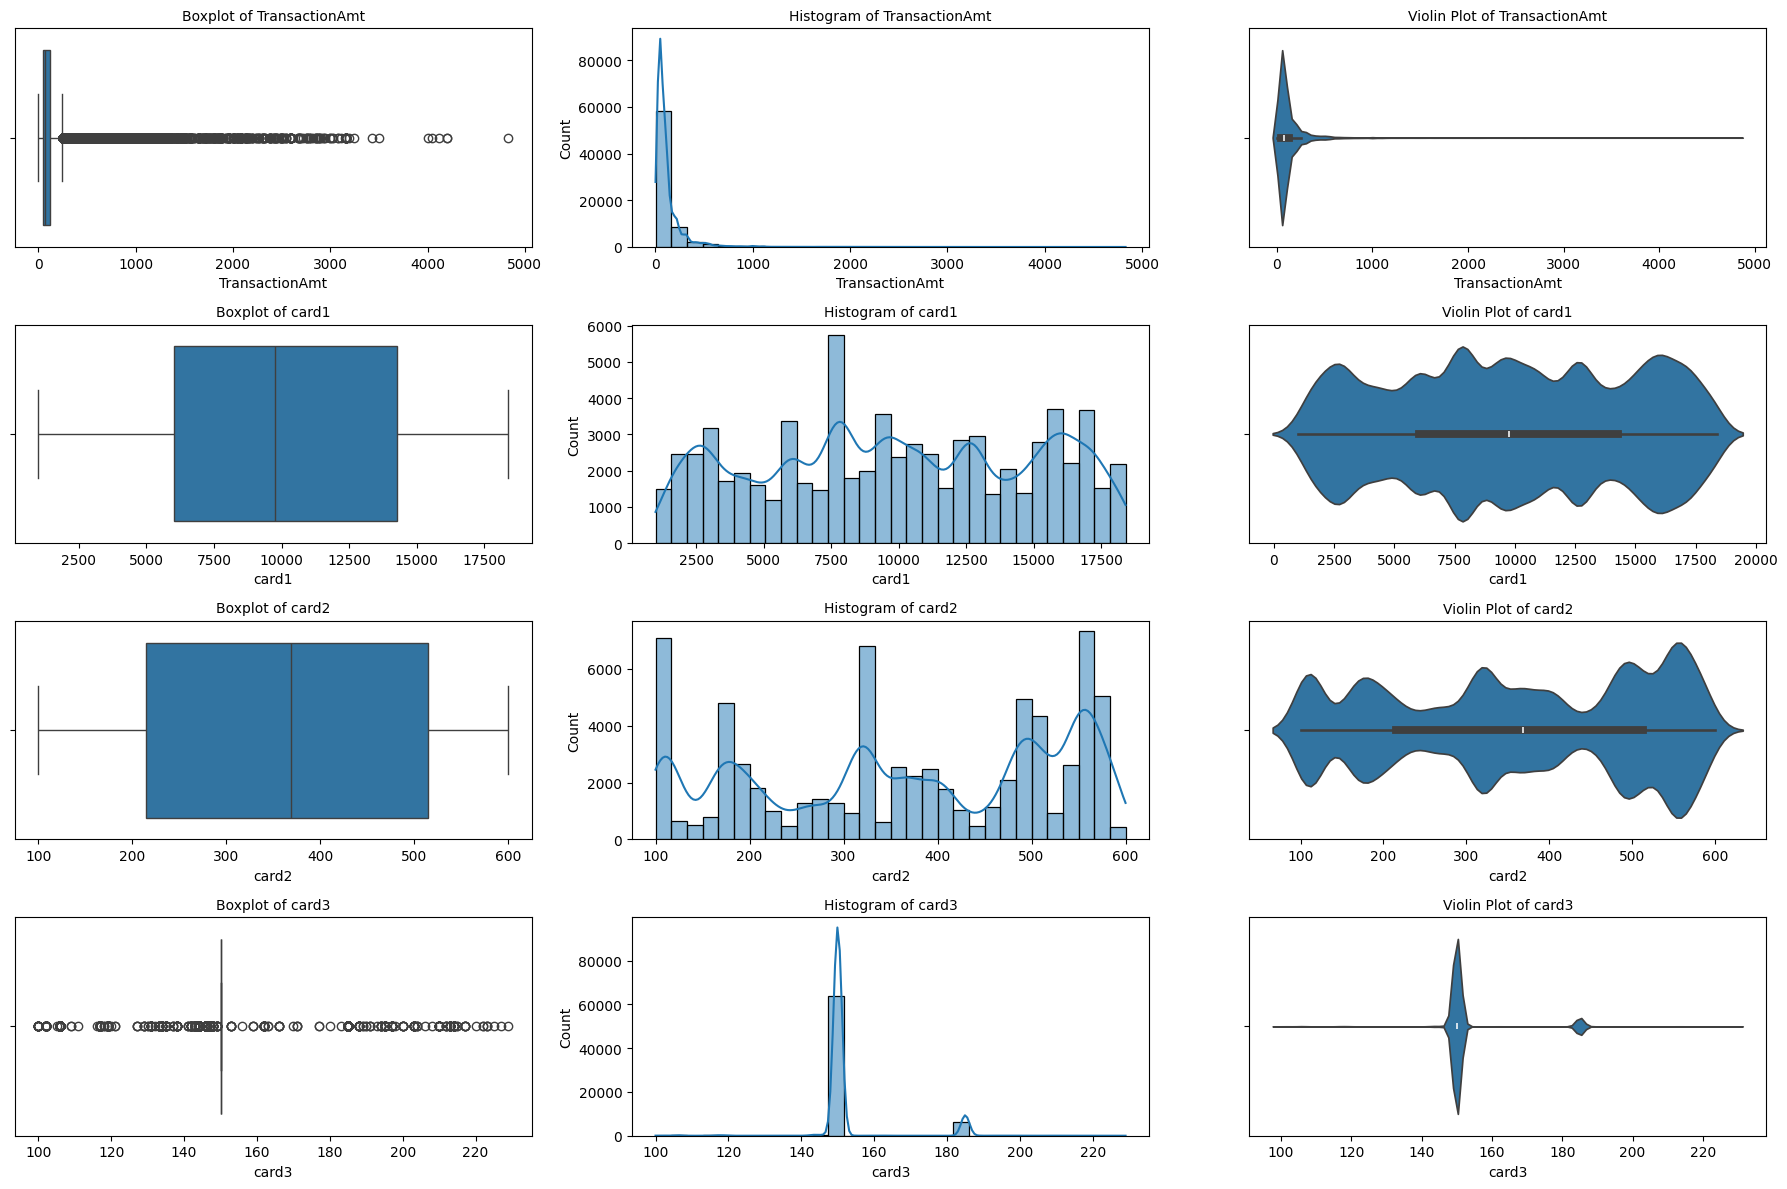

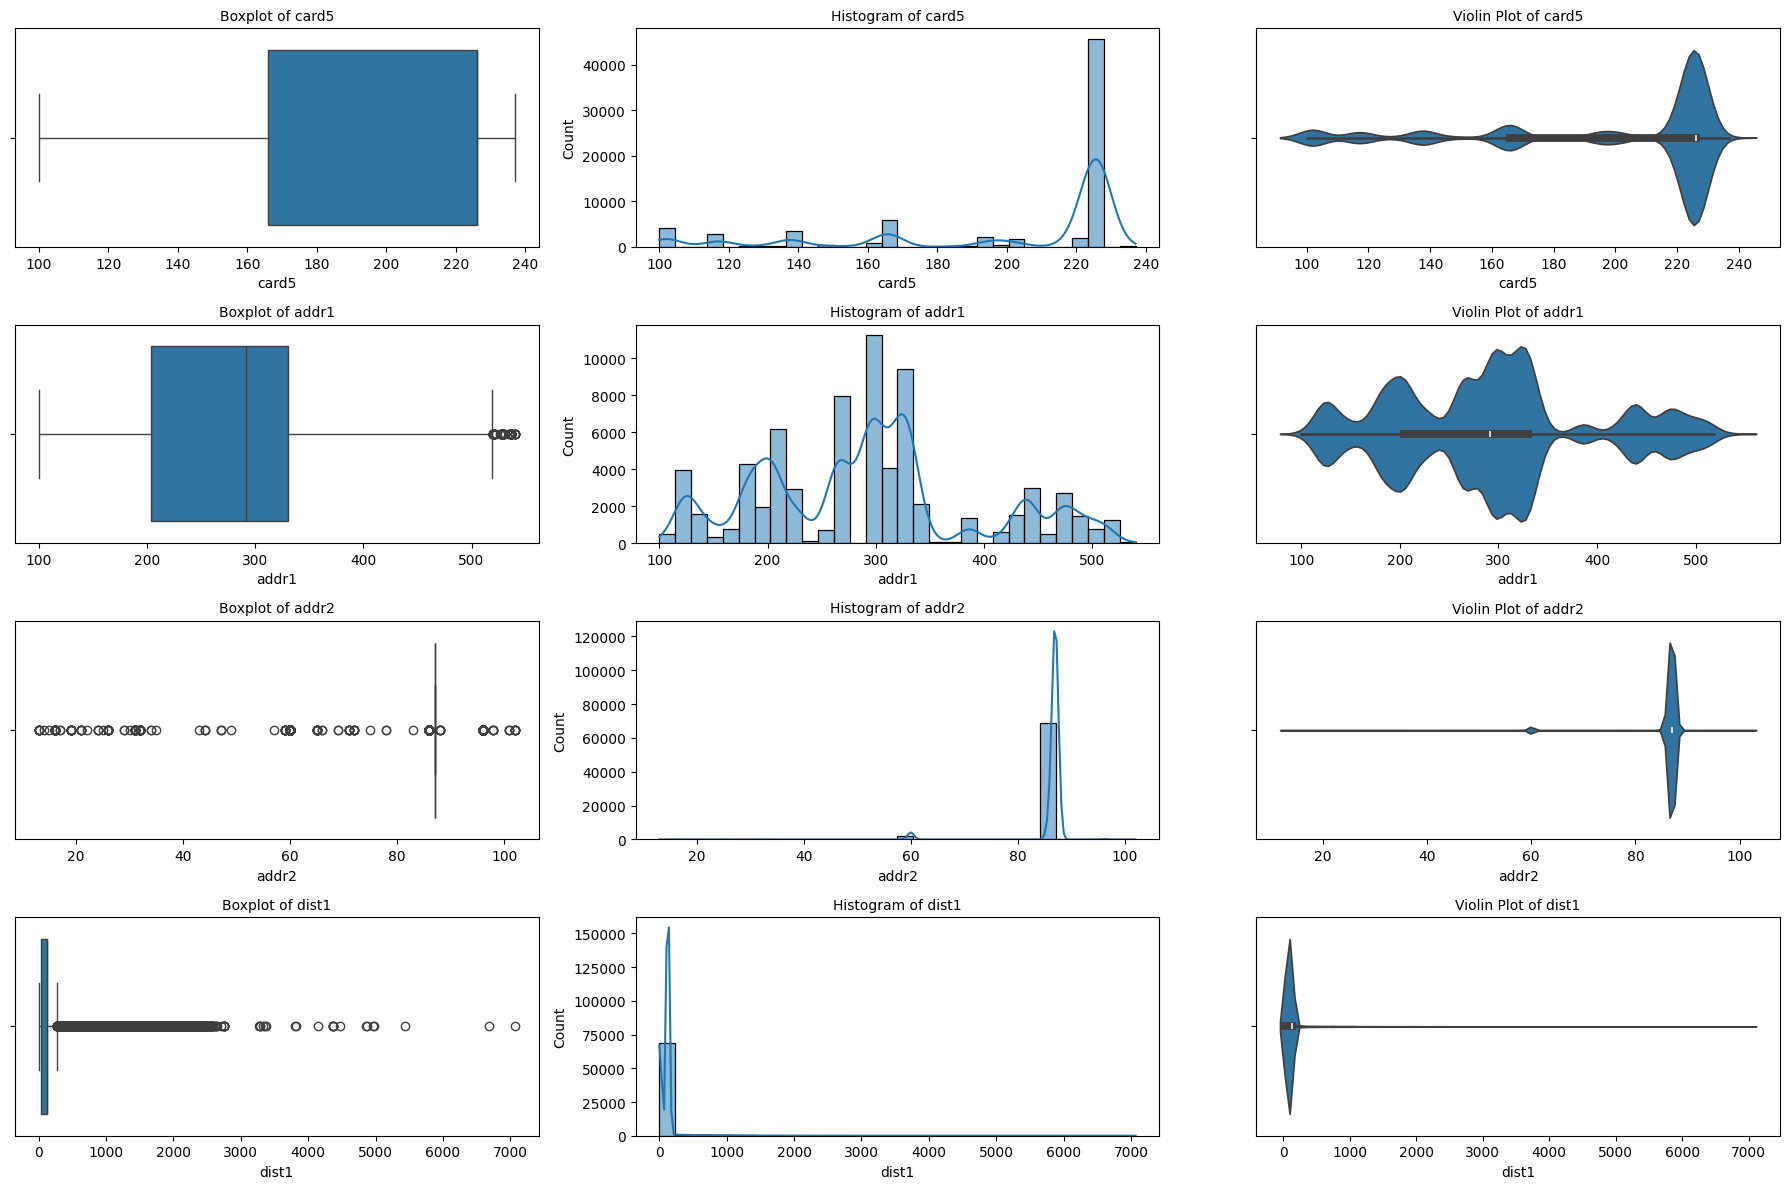

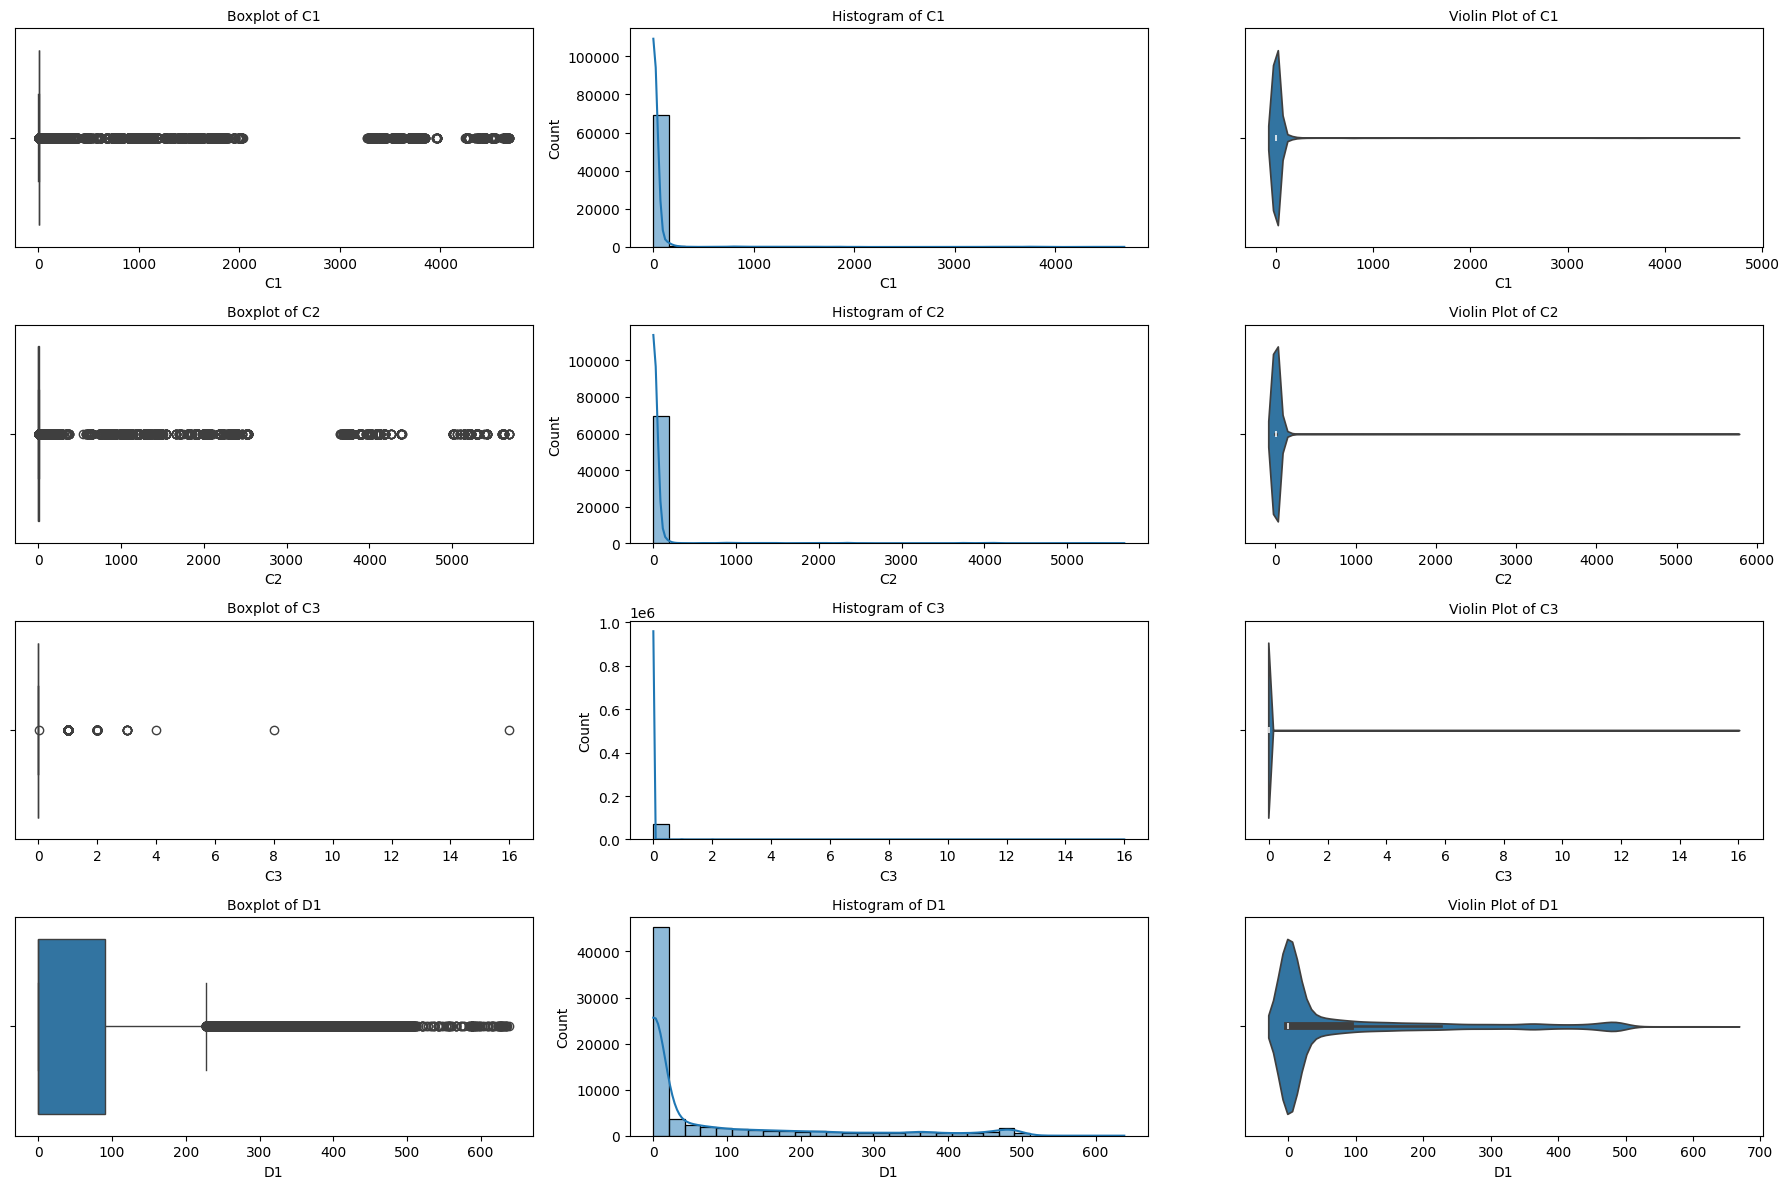

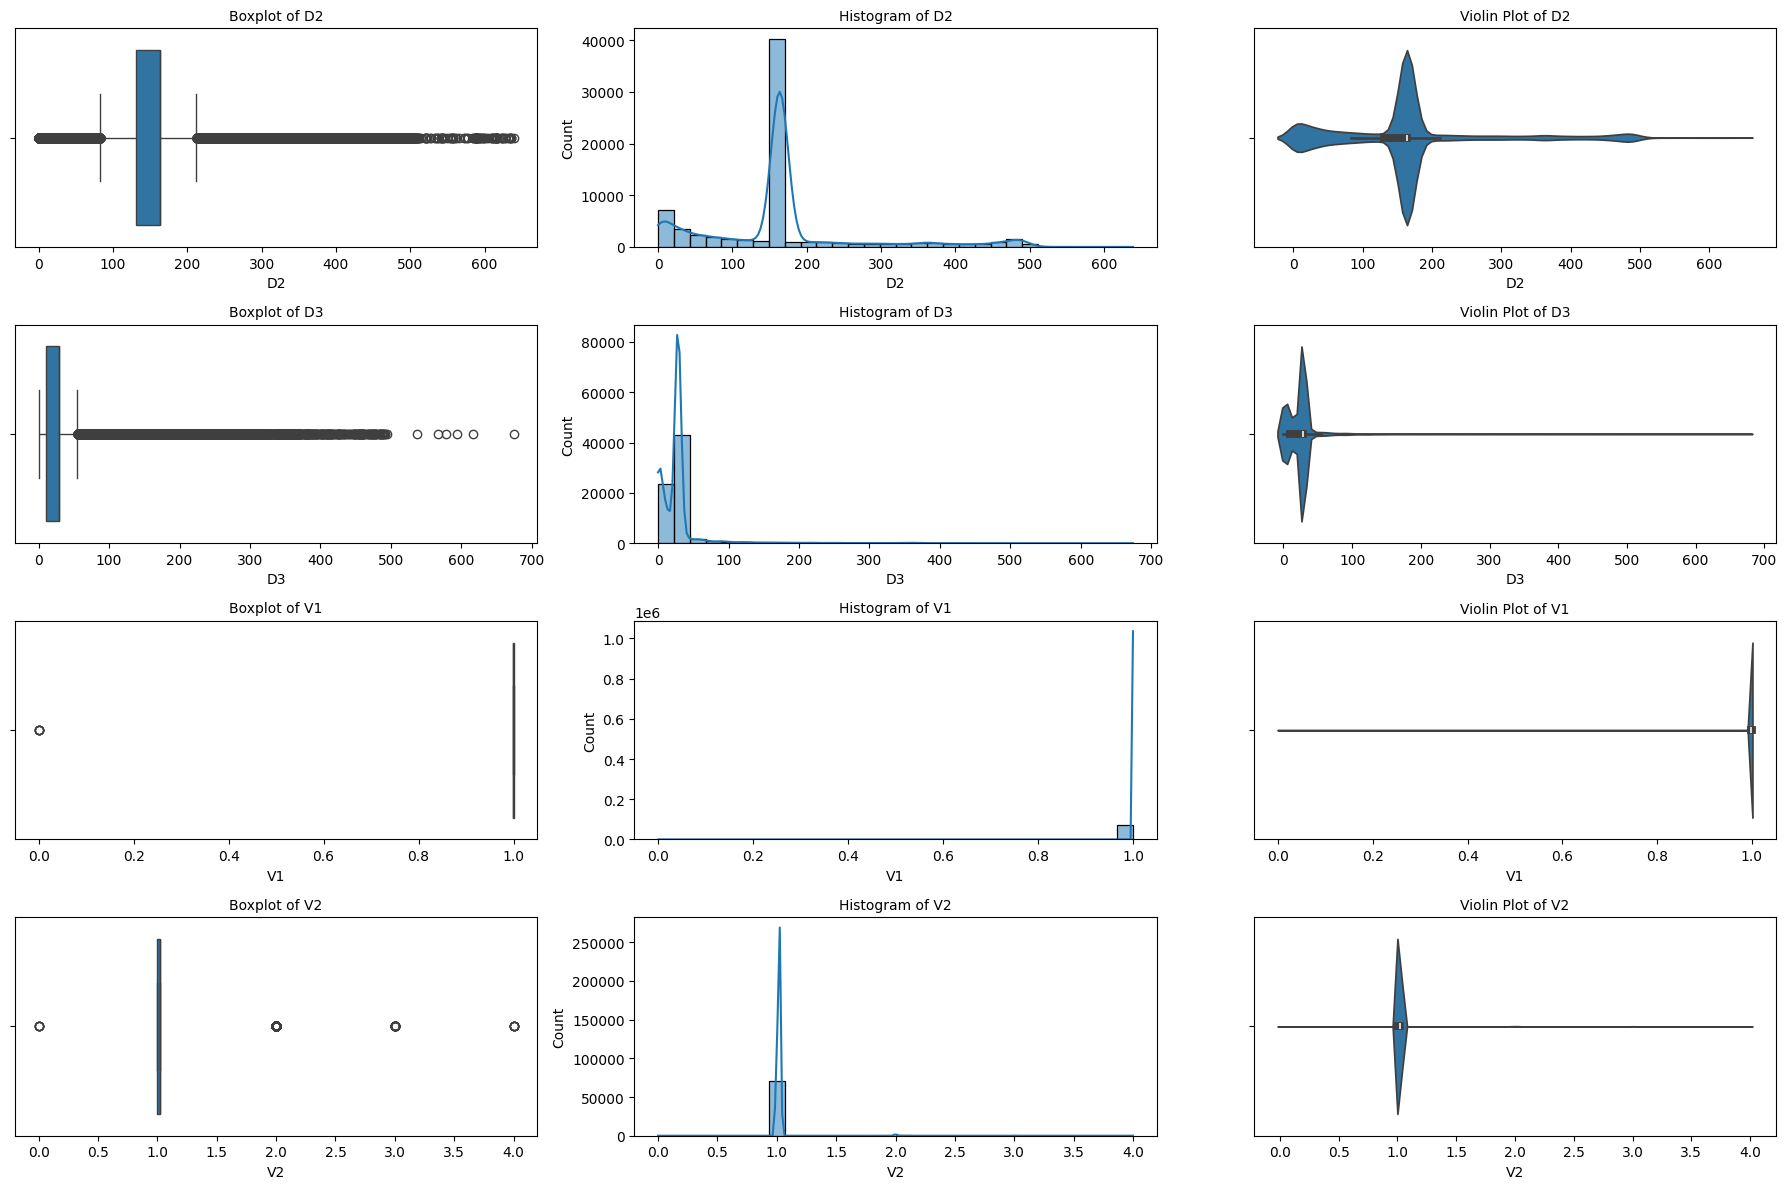

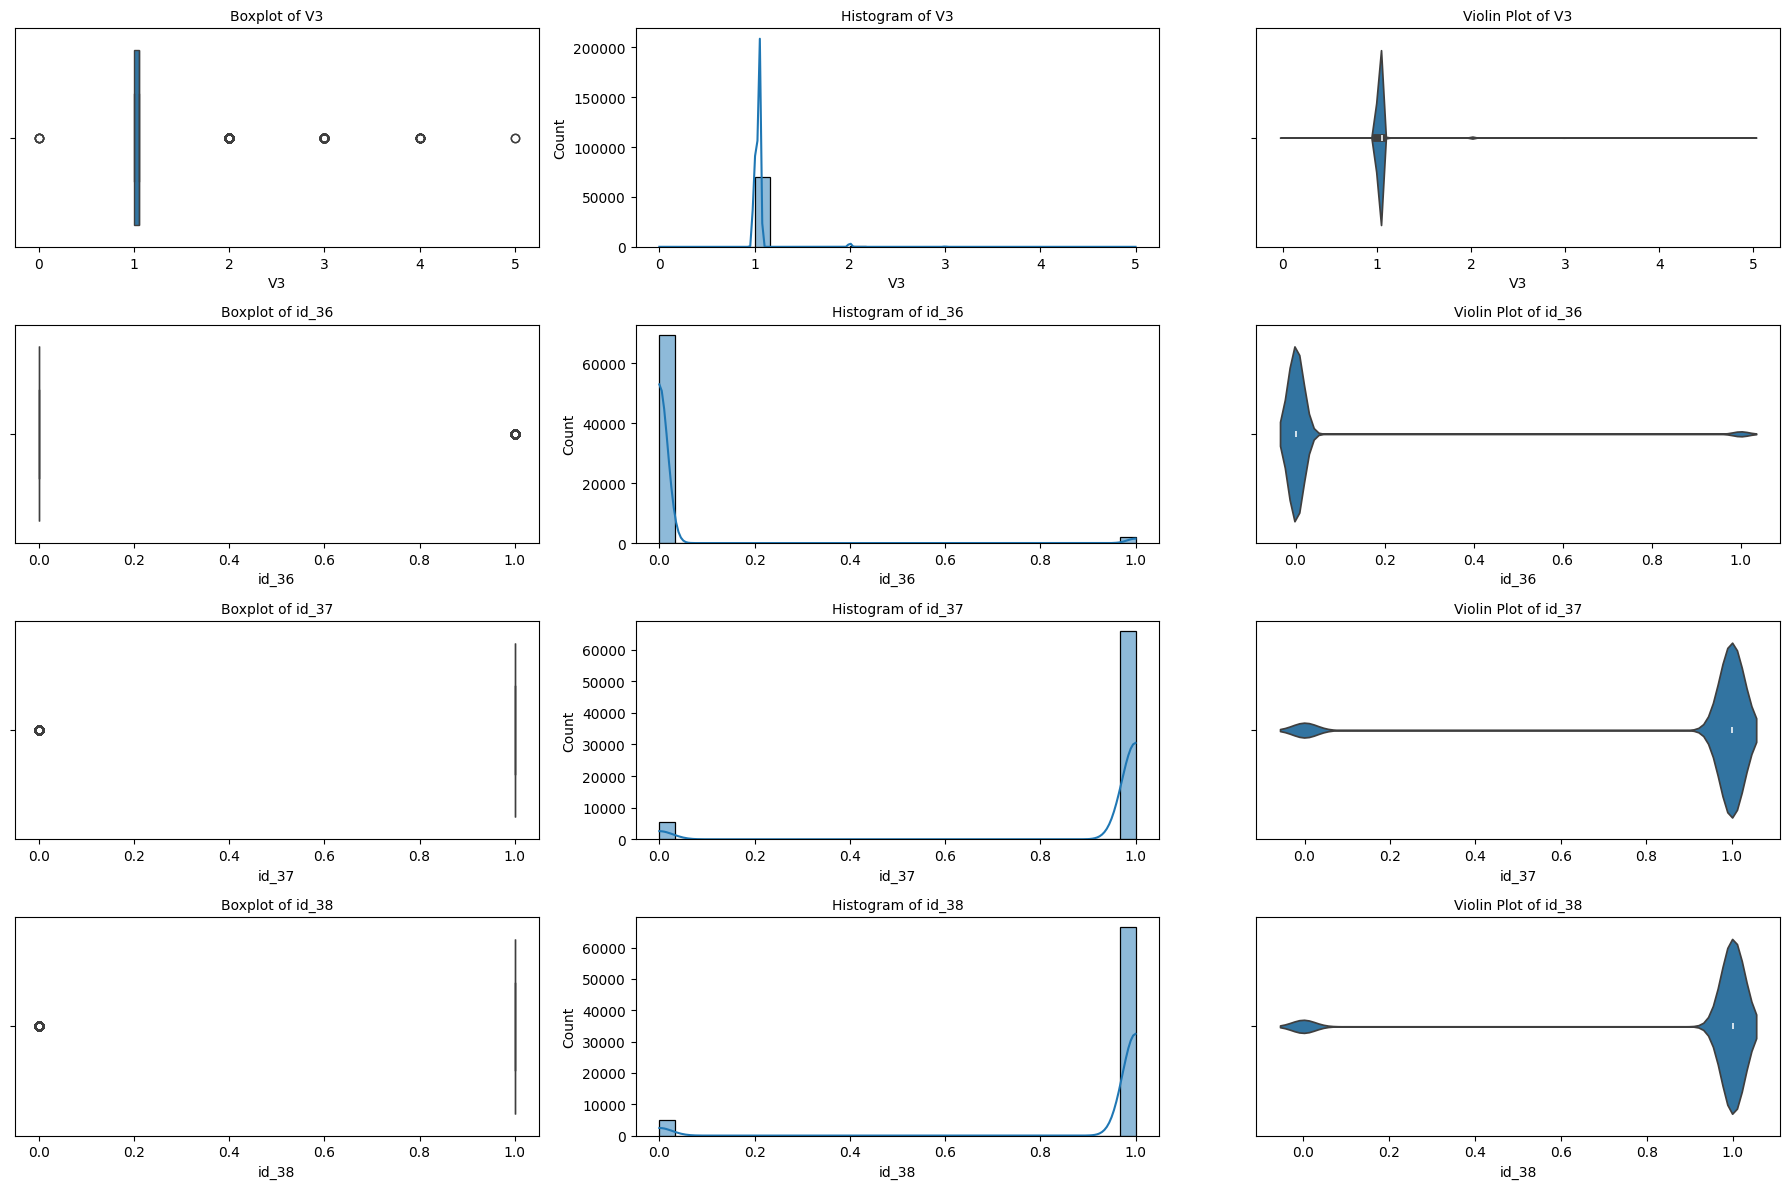

In [ ]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]


selected_features = [col for col in important_features if col in train.columns]

# Set batch size for readable plots
batch_size = 4

for i in range(0, len(selected_features), batch_size):
    batch = selected_features[i:i + batch_size]
    plt.figure(figsize=(18, 12))

    for j, col in enumerate(batch):
        # Boxplot
        plt.subplot(len(batch), 3, j * 3 + 1)
        sns.boxplot(x=train[col])
        plt.title(f'Boxplot of {col}', fontsize=10)

        # Histogram
        plt.subplot(len(batch), 3, j * 3 + 2)
        sns.histplot(train[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}', fontsize=10)

        # Violin plot
        plt.subplot(len(batch), 3, j * 3 + 3)
        sns.violinplot(x=train[col])
        plt.title(f'Violin Plot of {col}', fontsize=10)

    plt.tight_layout()
    plt.show()


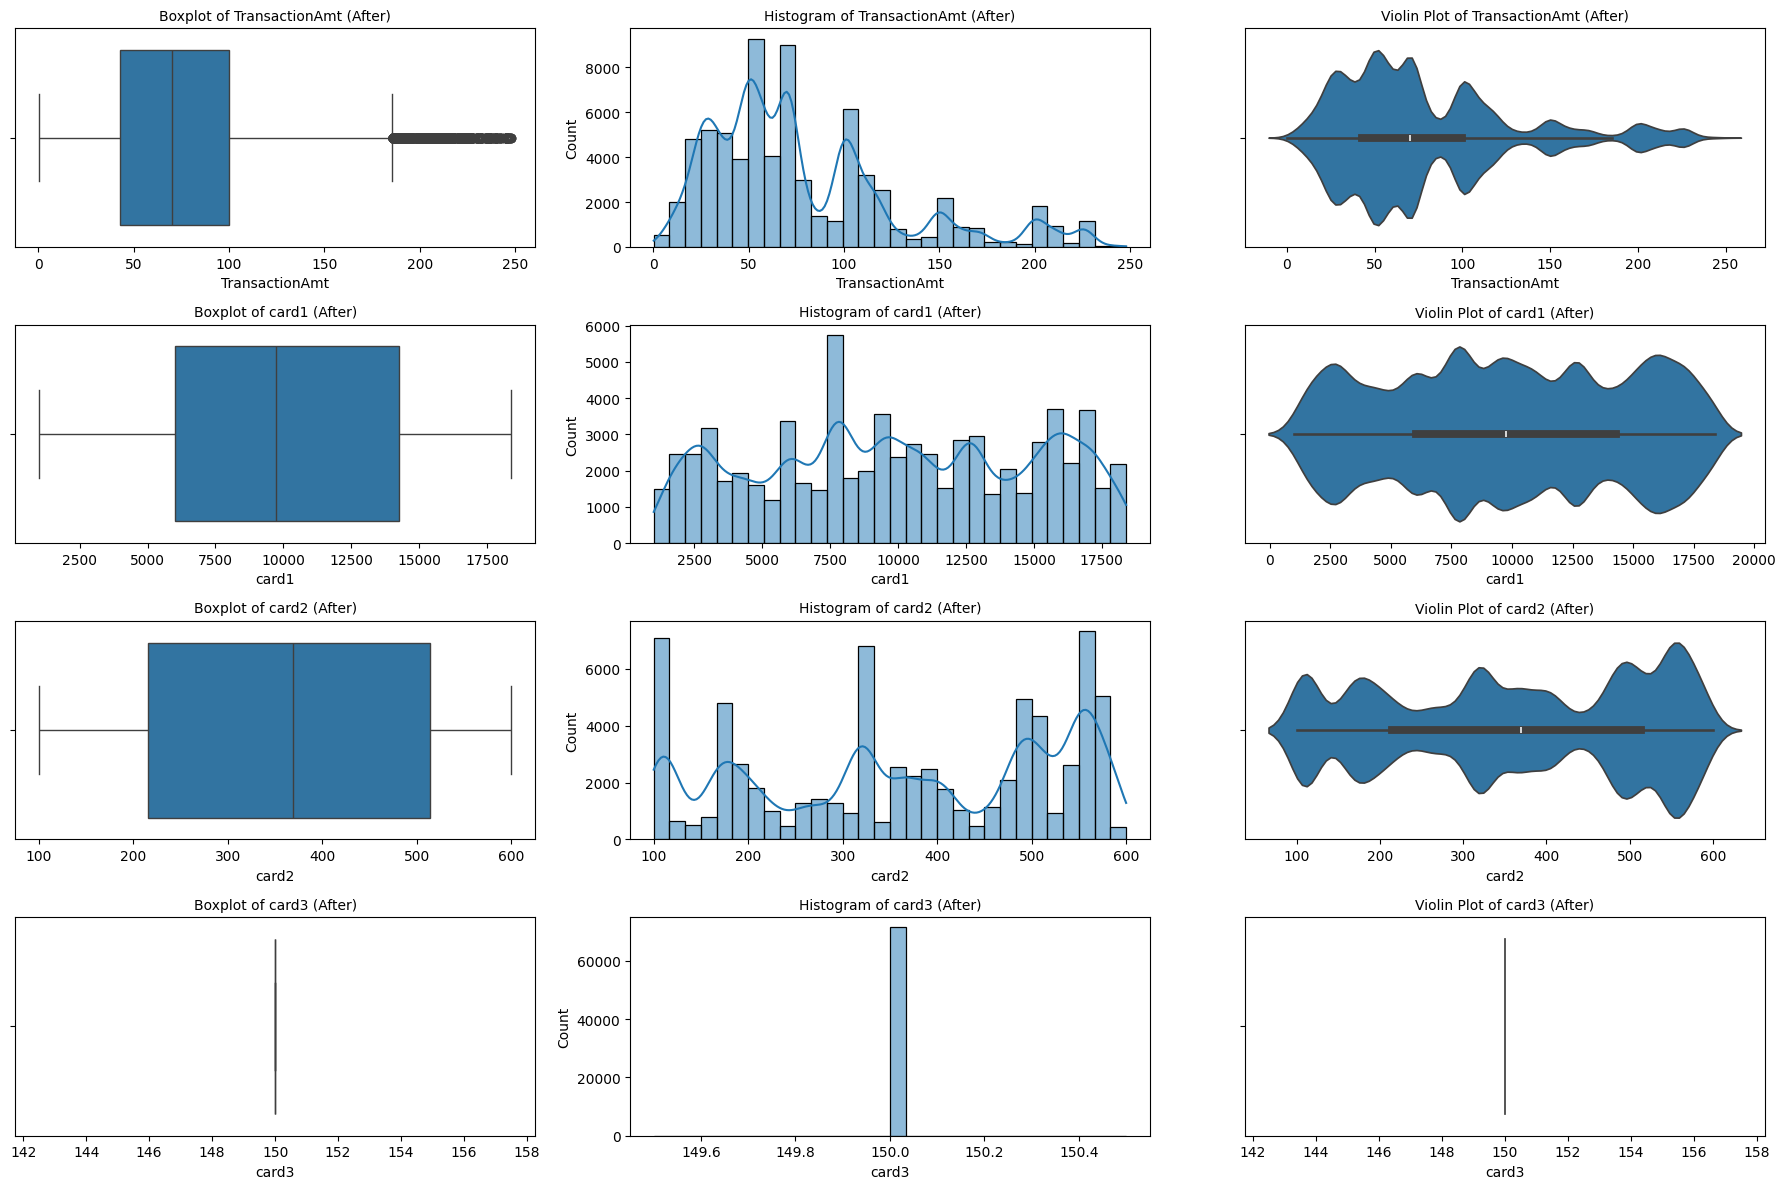

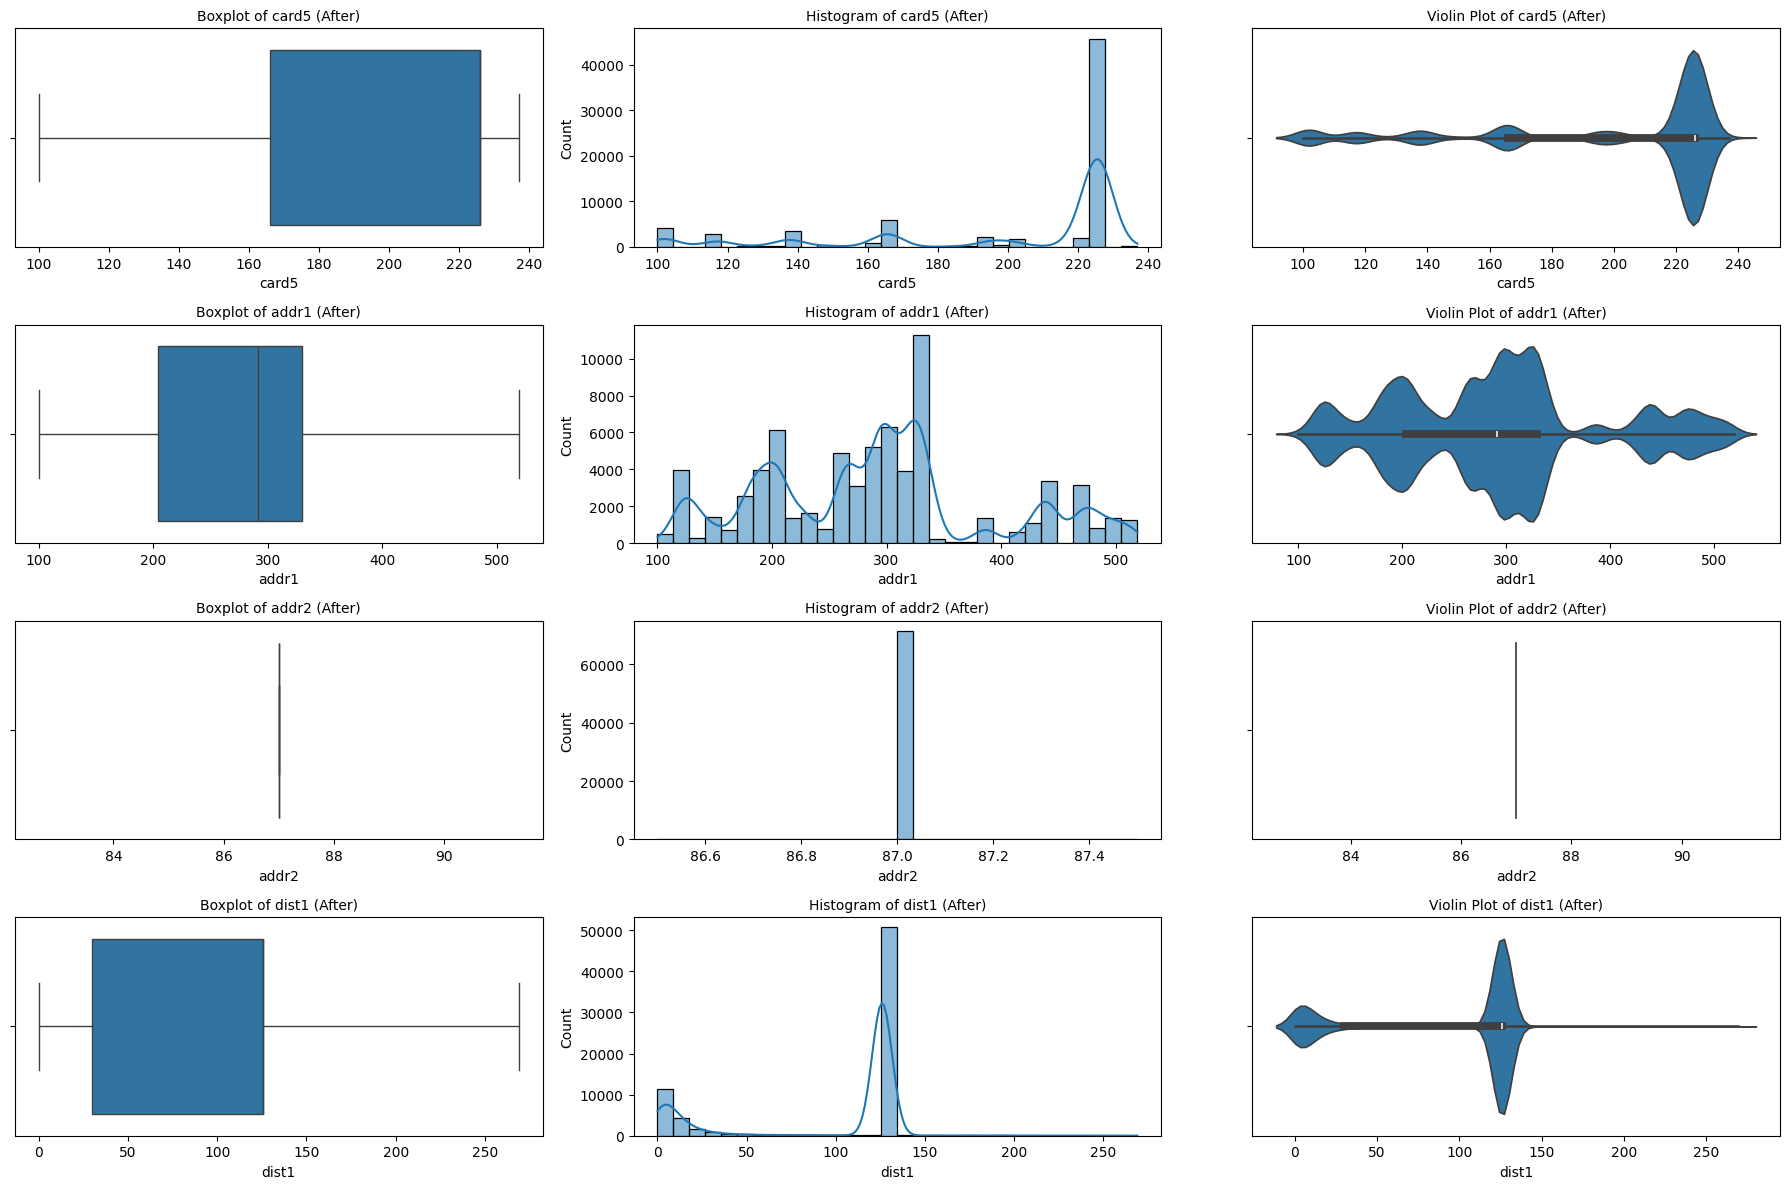

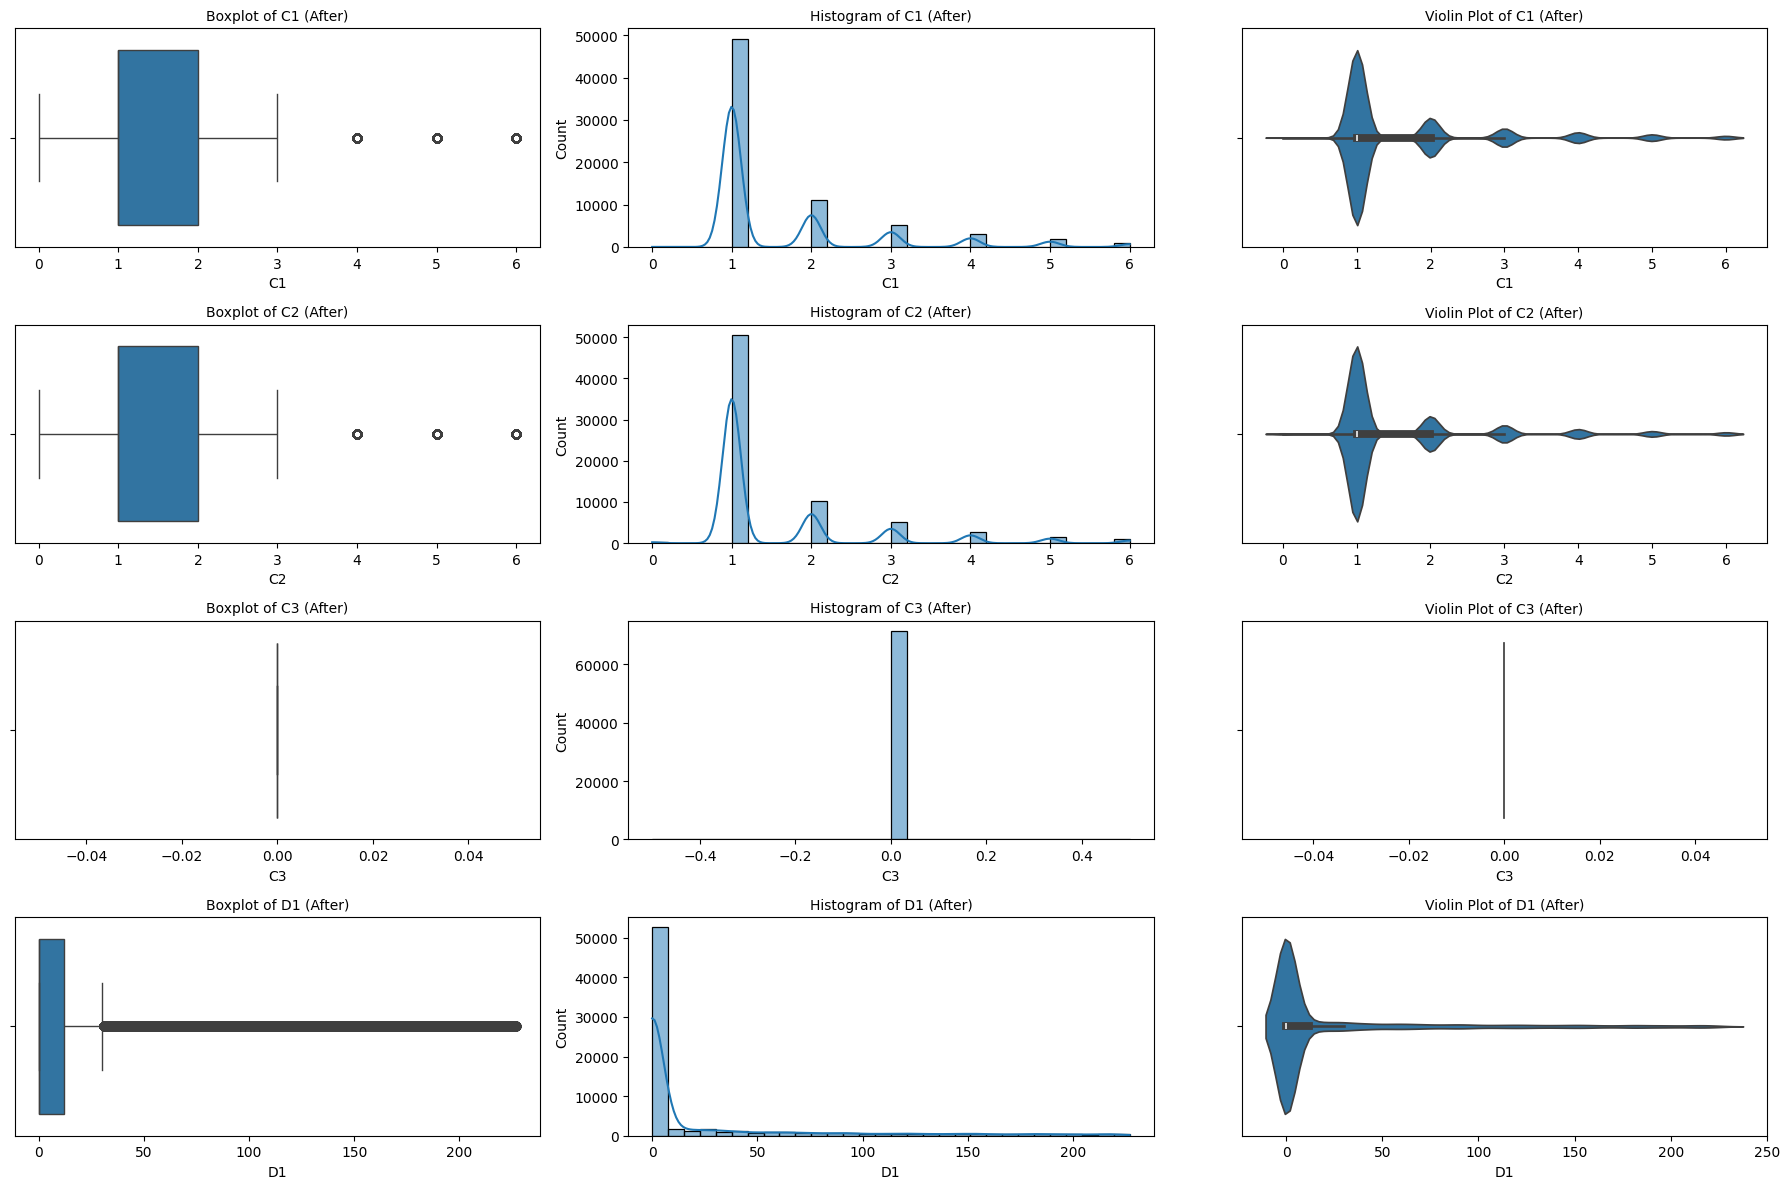

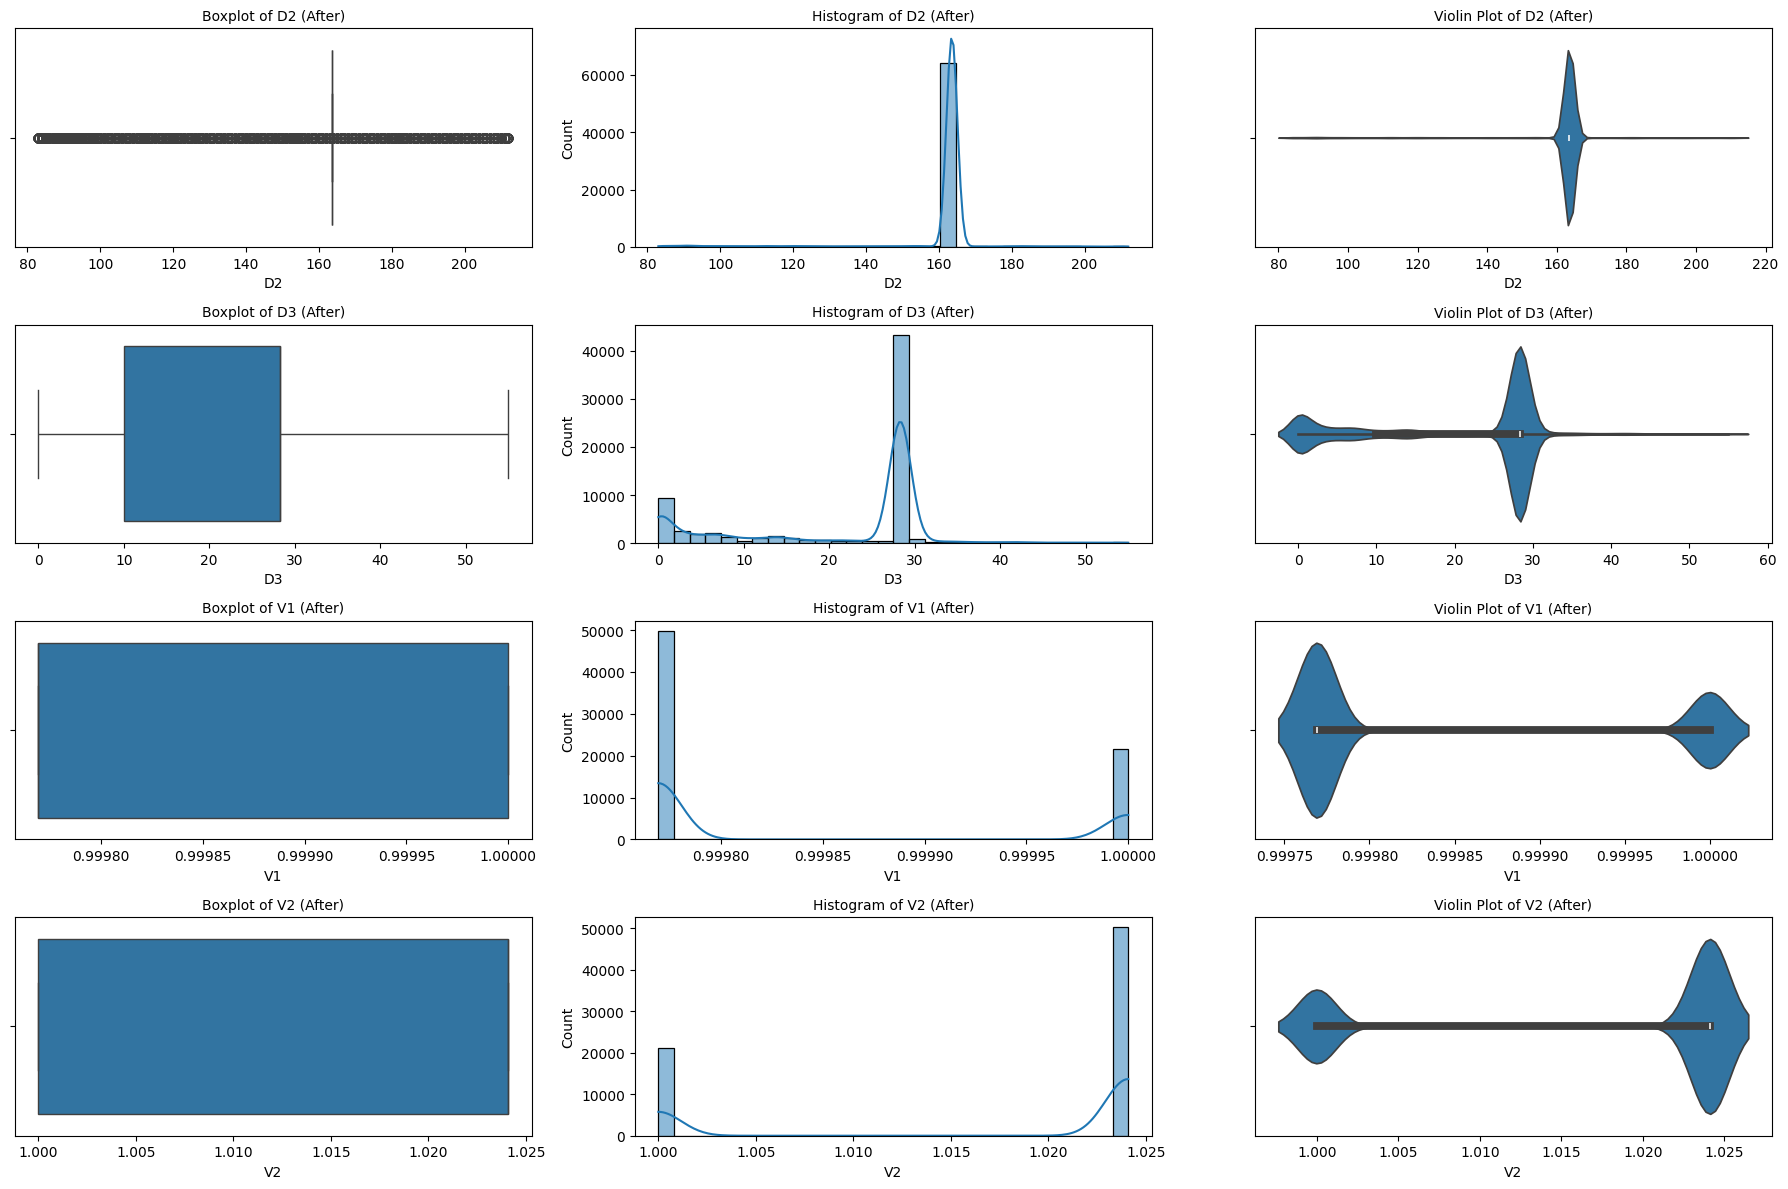

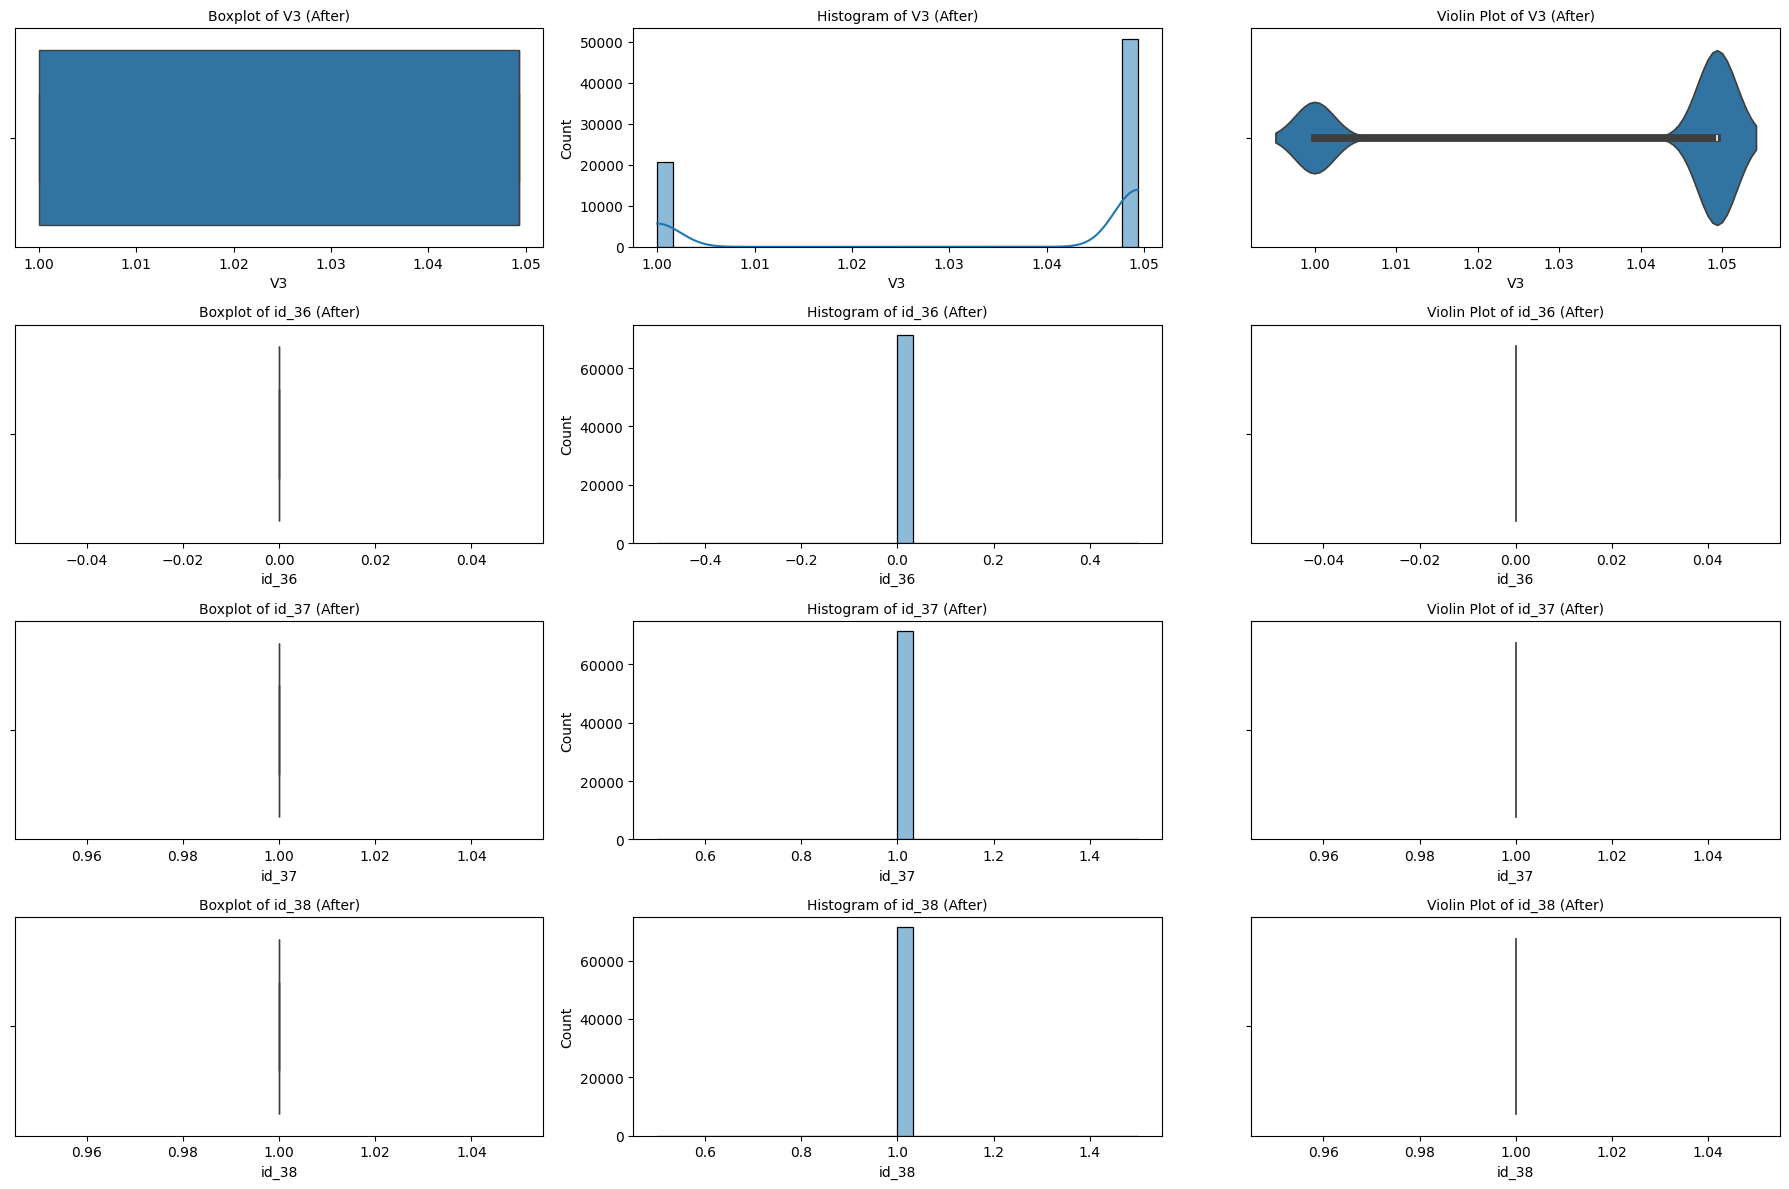

In [ ]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]

features = [col for col in important_features if col in train.columns]


df_clean = train.copy()


for col in features:
    median_value = train[col].median()
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean[col] = np.where((train[col] < lower_bound) | (train[col] > upper_bound), median_value, train[col])


batch_size = 4

for i in range(0, len(features), batch_size):
    batch = features[i:i + batch_size]
    plt.figure(figsize=(18, 12))

    for j, col in enumerate(batch):
        # Boxplot
        plt.subplot(len(batch), 3, j * 3 + 1)
        sns.boxplot(x=df_clean[col])
        plt.title(f'Boxplot of {col} (After)', fontsize=10)

        # Histogram
        plt.subplot(len(batch), 3, j * 3 + 2)
        sns.histplot(df_clean[col], bins=30, kde=True)
        plt.title(f'Histogram of {col} (After)', fontsize=10)

        # Violin plot
        plt.subplot(len(batch), 3, j * 3 + 3)
        sns.violinplot(x=df_clean[col])
        plt.title(f'Violin Plot of {col} (After)', fontsize=10)

    plt.tight_layout()
    plt.show()


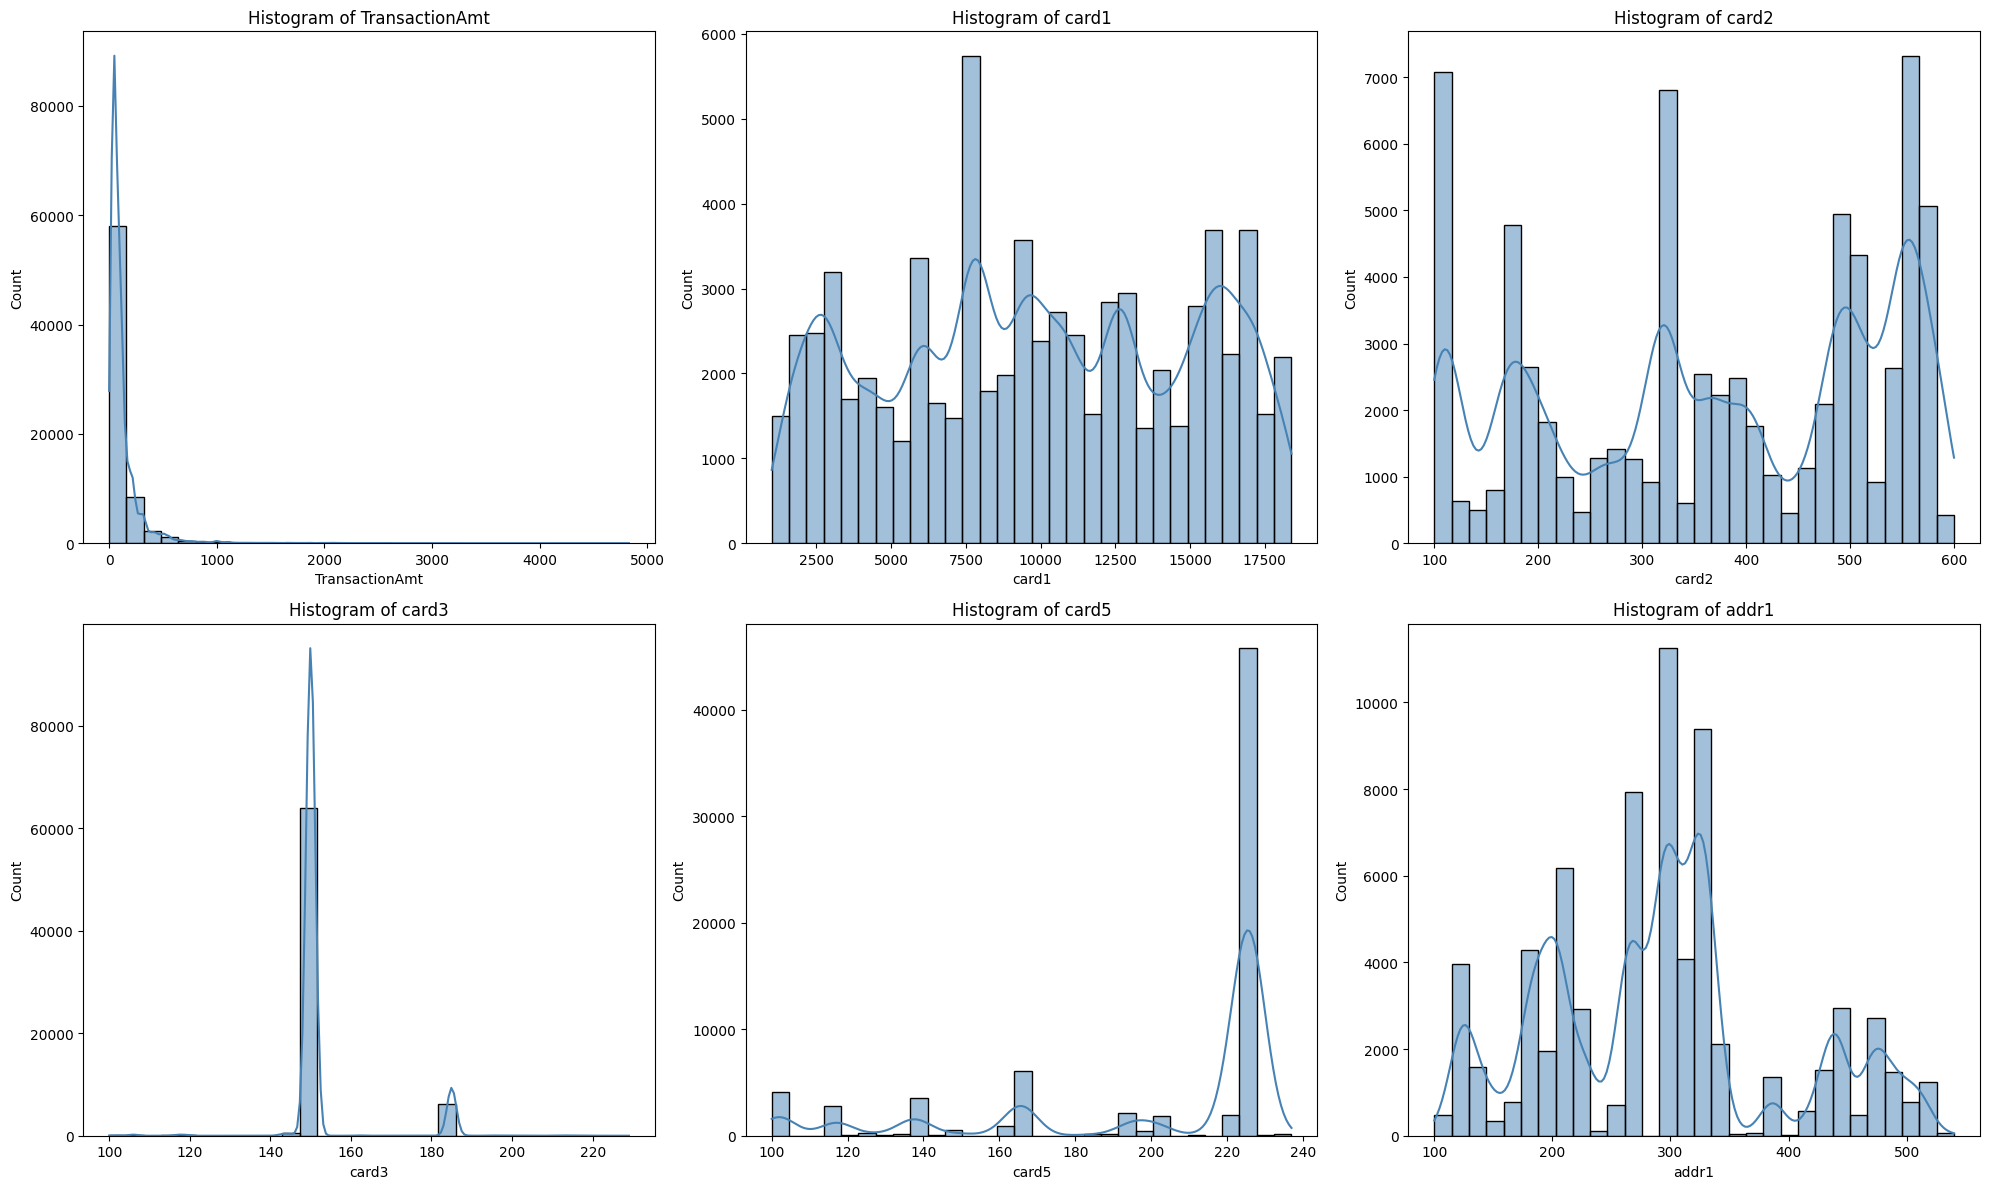

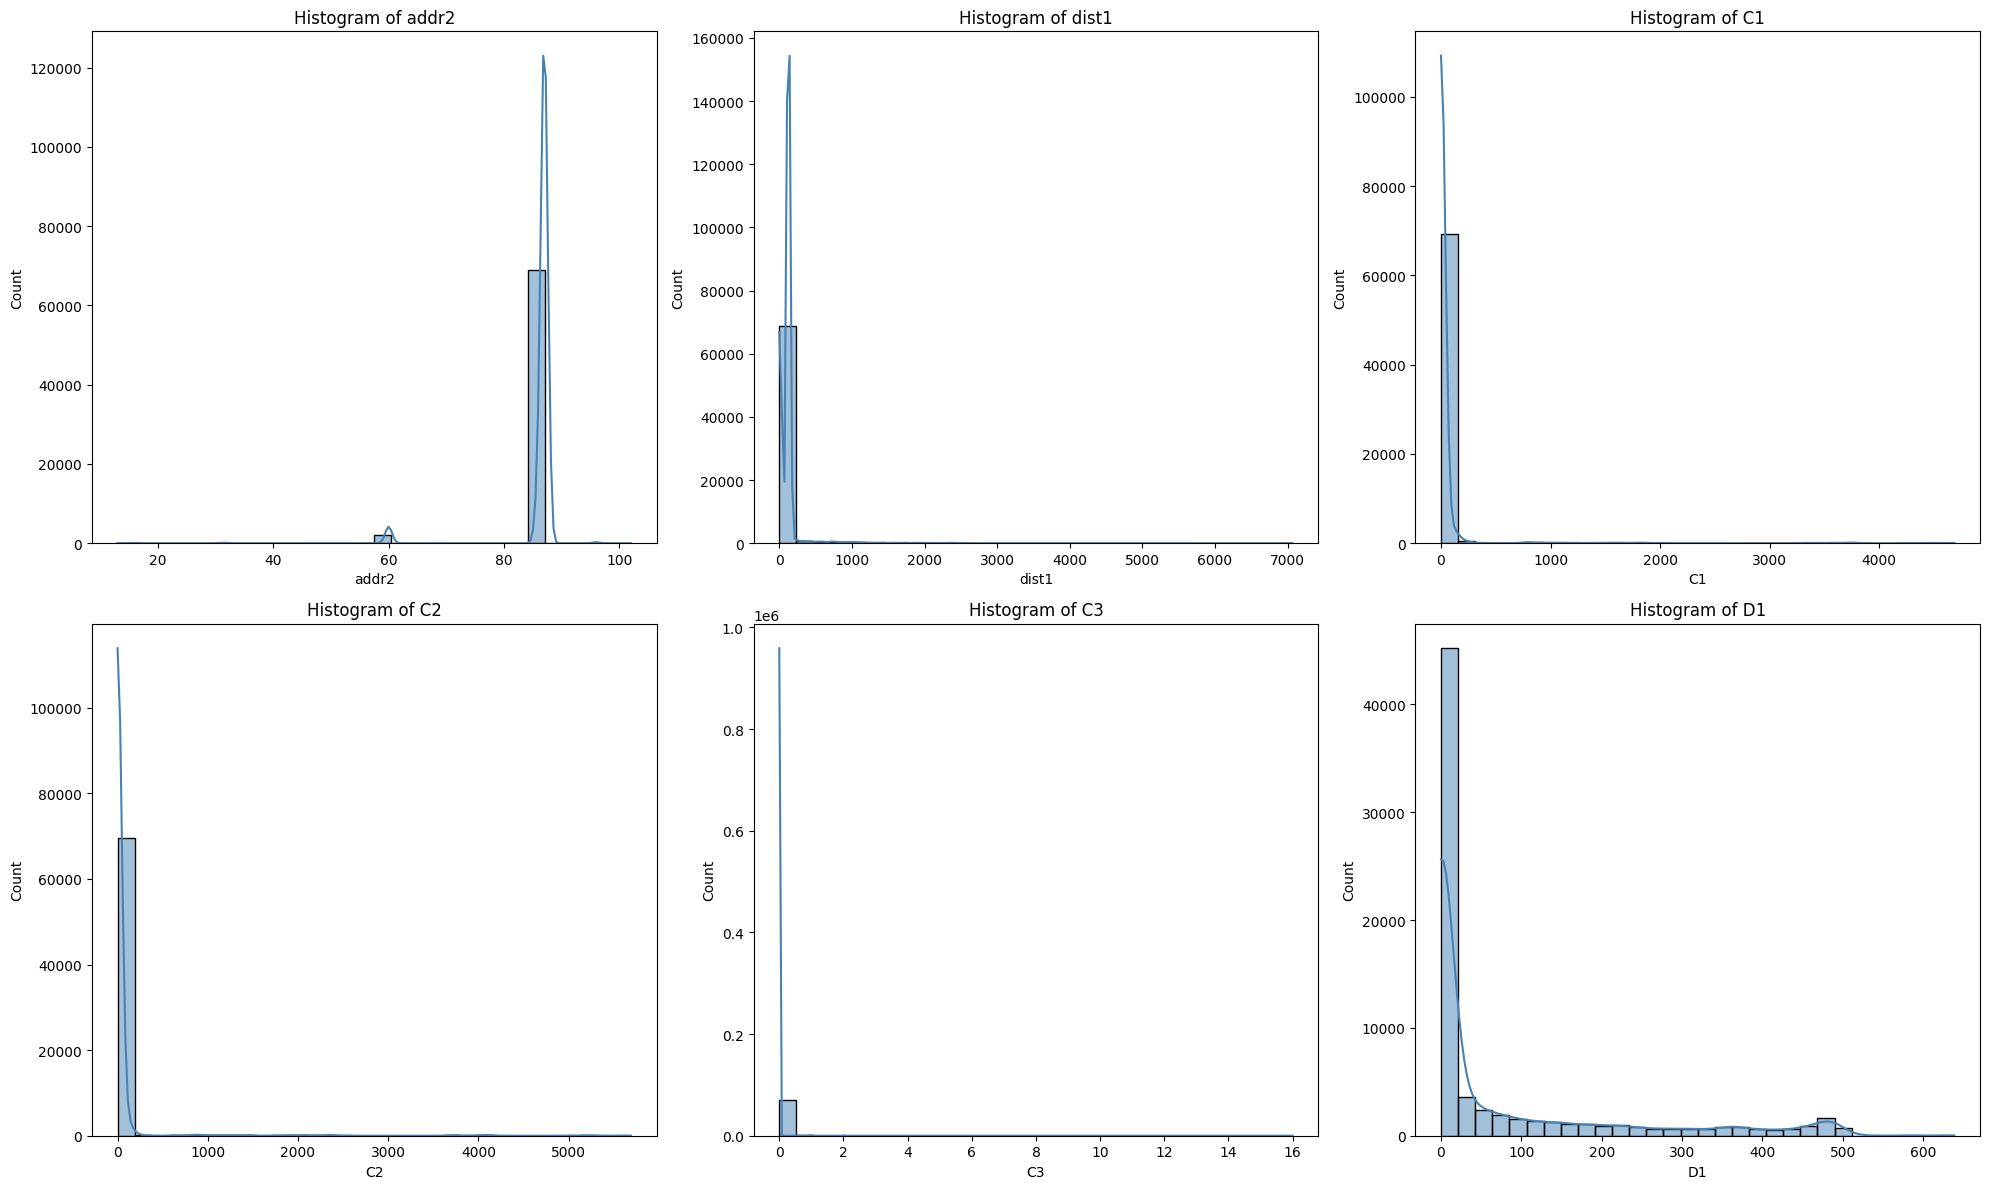

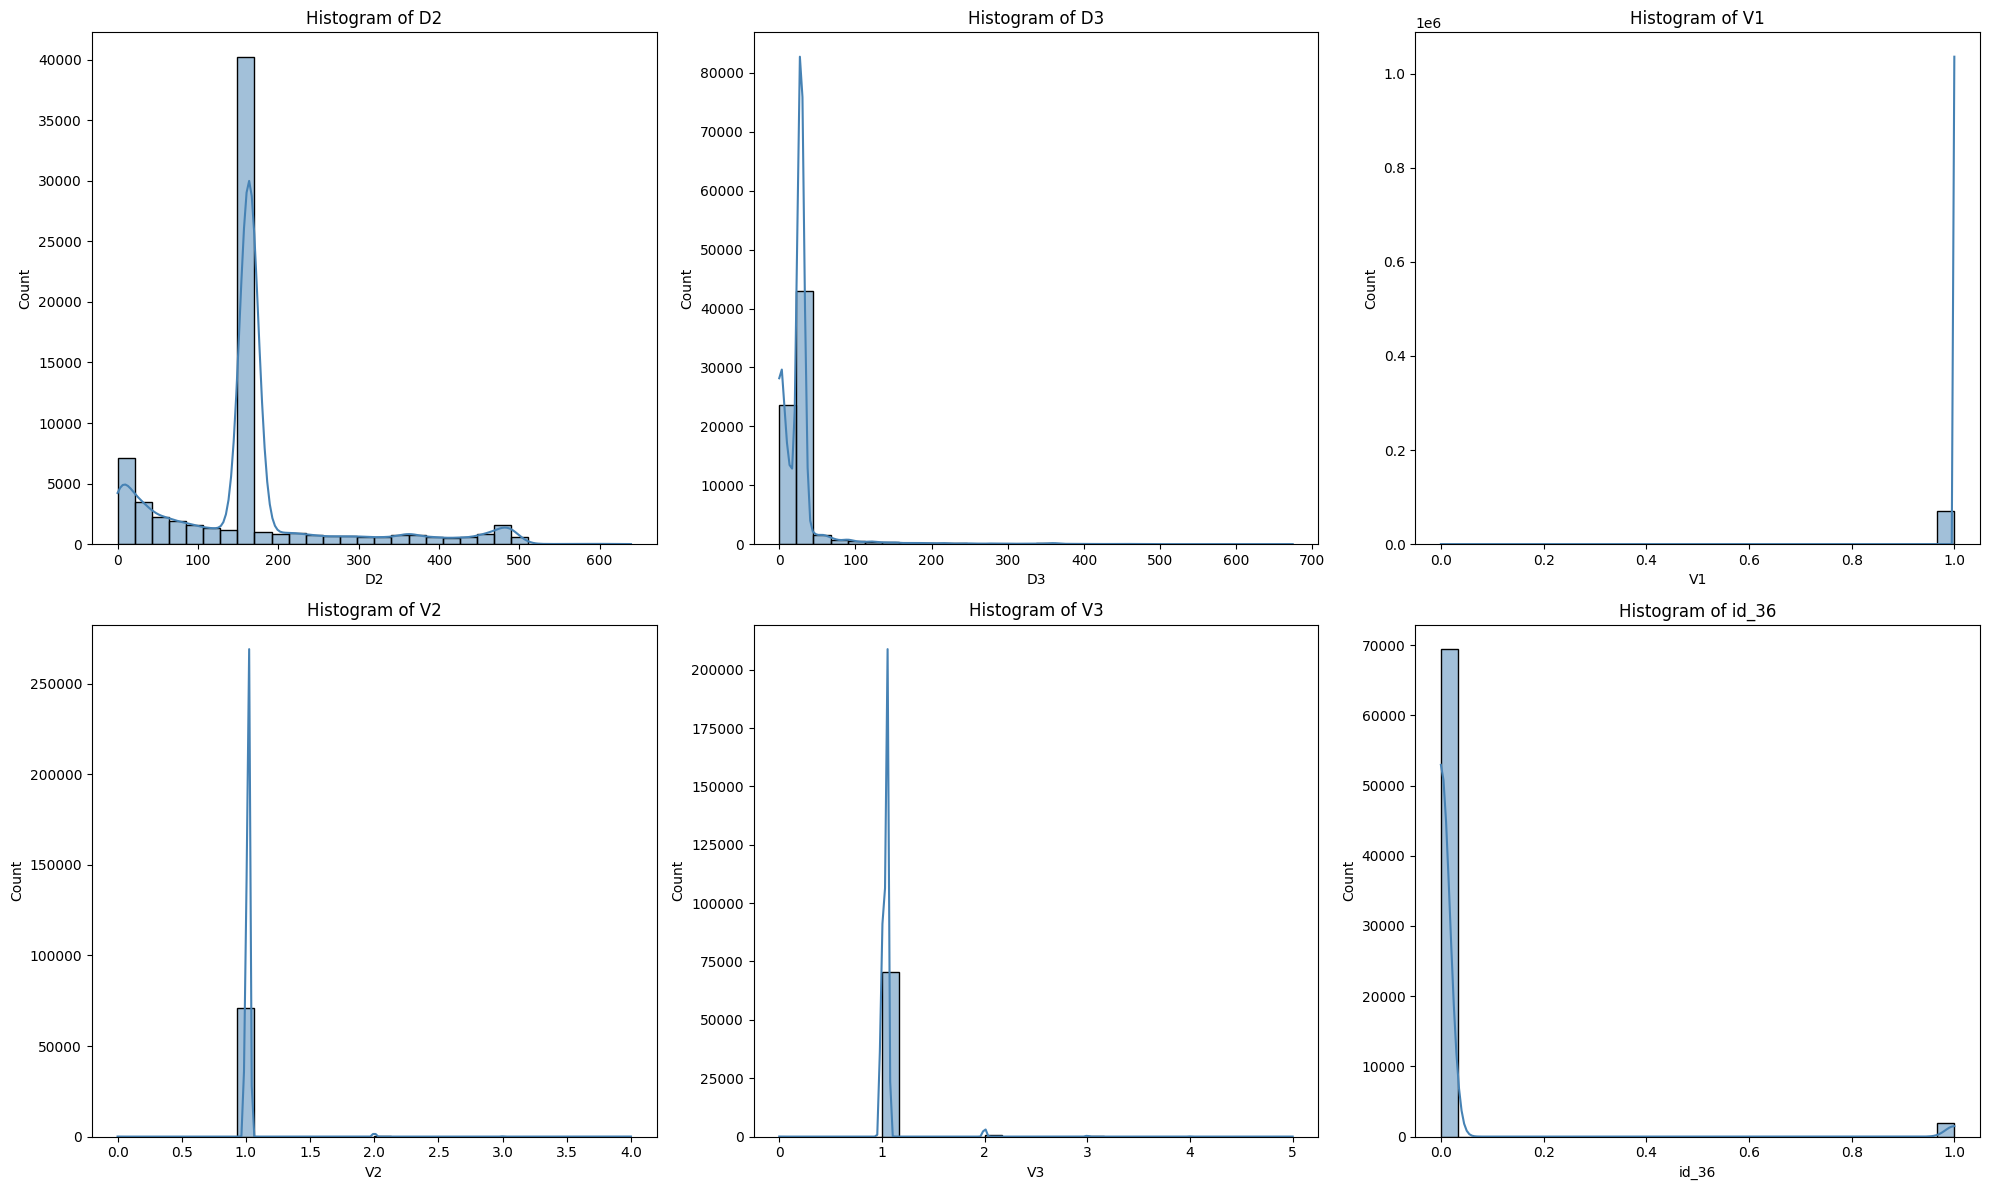

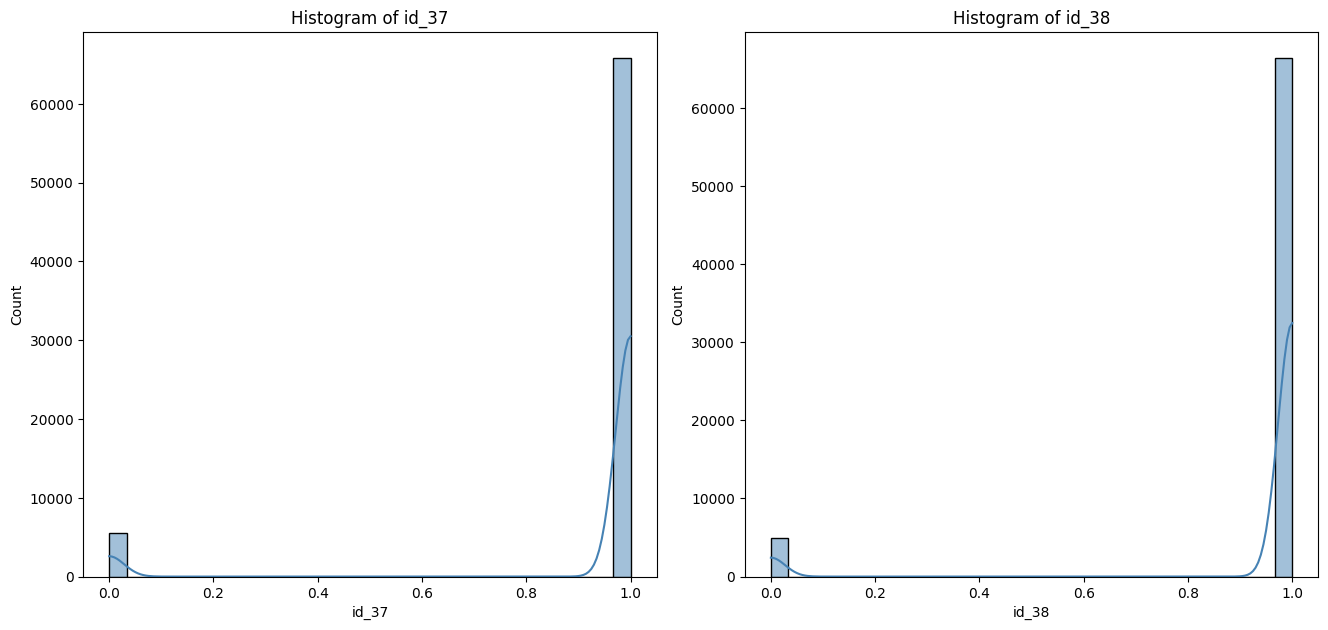

In [ ]:
important_features = [
    'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
    'addr1', 'addr2', 'dist1', 'dist2',
    'C1', 'C2', 'C3', 'D1', 'D2', 'D3',
    'V1', 'V2', 'V3', 'id_36', 'id_37', 'id_38'
]

features = [col for col in important_features if col in train.columns]

# Plot histograms in batches
batch_size = 6

for i in range(0, len(features), batch_size):
    batch = features[i:i + batch_size]
    plt.figure(figsize=(20, 12))

    for j, col in enumerate(batch):
        plt.subplot(2, 3, j + 1)
        sns.histplot(train[col], bins=30, color='steelblue', kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

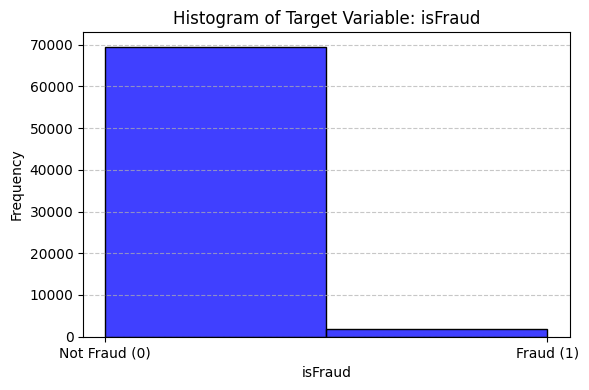

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(train['isFraud'], bins=2, color='blue')
plt.title('Histogram of Target Variable: isFraud')
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
print("Skewness:", skew(train[col].dropna()))
print("Kurtosis:", kurtosis(train[col].dropna()))


Skewness: -3.386149114140181
Kurtosis: 9.46600582319233


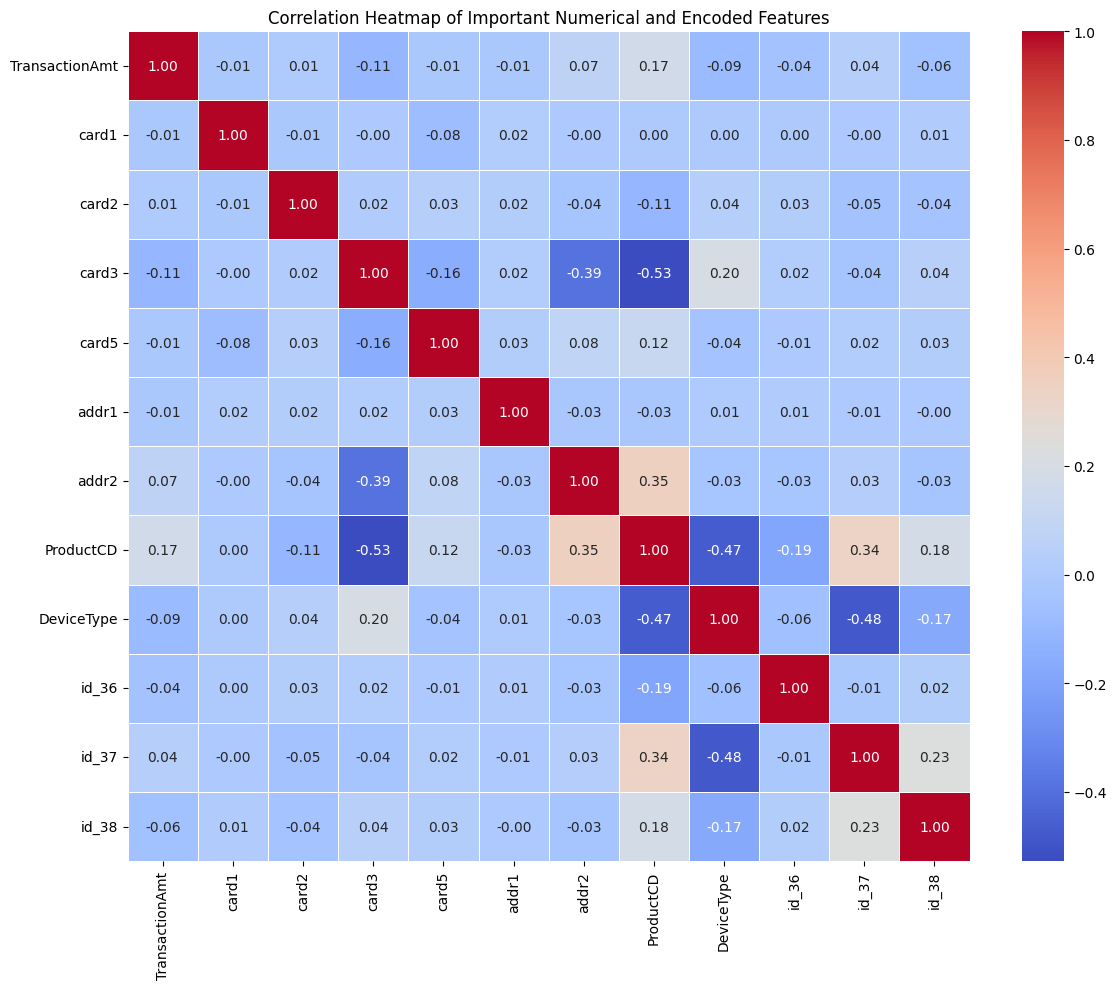

In [ ]:
important_numerical_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']


encoded_features = ['ProductCD', 'DeviceType', 'id_36', 'id_37', 'id_38']


selected_features = important_numerical_features + encoded_features

correlation_df = train[selected_features]


corr_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Important Numerical and Encoded Features")
plt.tight_layout()
plt.show()

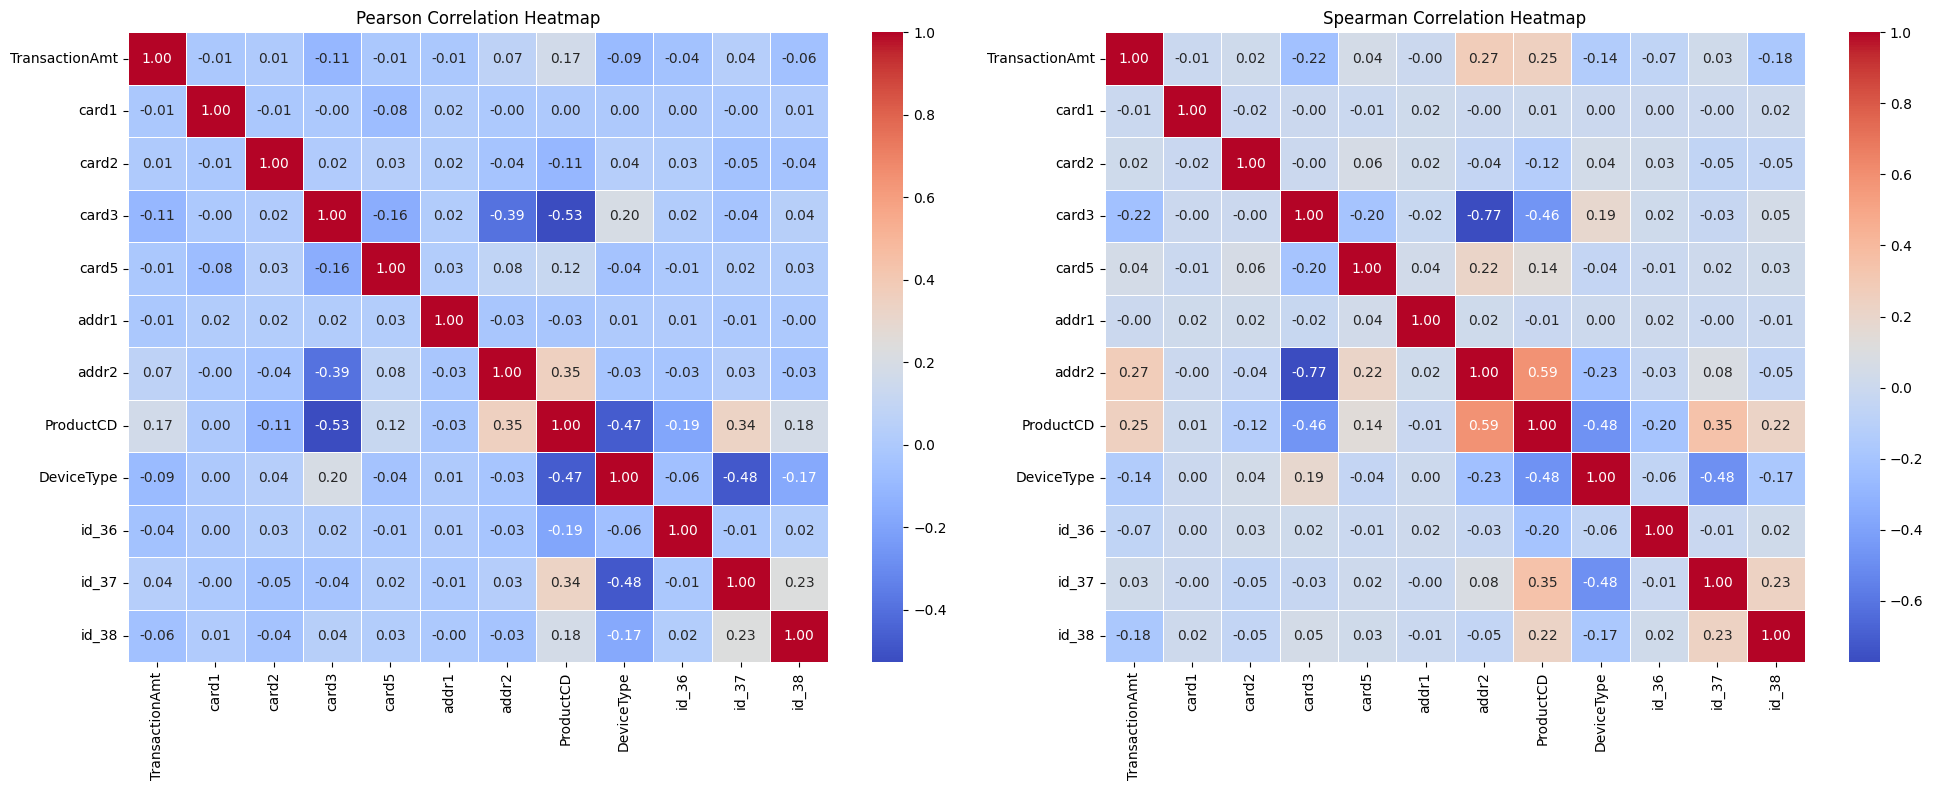

In [ ]:
important_numerical_features = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']
encoded_features = ['ProductCD', 'DeviceType', 'id_36', 'id_37', 'id_38']
selected_features = important_numerical_features + encoded_features


correlation_df = train[selected_features]

pearson_corr = correlation_df.corr(method='pearson')
spearman_corr = correlation_df.corr(method='spearman')


plt.figure(figsize=(20, 8))

# Pearson Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")

# Spearman Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()

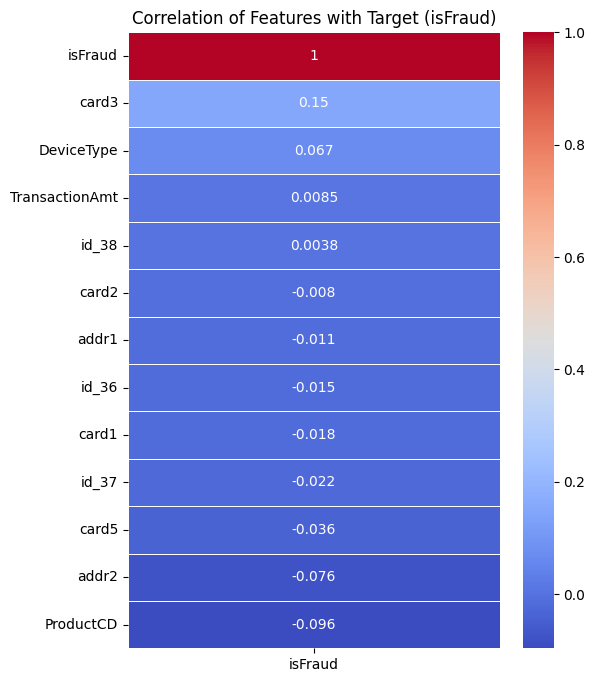

In [ ]:
selected_features = important_numerical_features + encoded_features + ['isFraud']

numerical_df = train[selected_features]

# Compute correlation with the target
corr_matrix = numerical_df.corr()[['isFraud']].sort_values(by='isFraud', ascending=False)


plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Features with Target (isFraud)")
plt.show()

# Feature Selection

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 39 154] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


    Feature      F_score  p_value
248    V201  4264.326646      0.0
236    V189  3818.760360      0.0
92      V45  3328.773348      0.0
247    V200  3222.453635      0.0
304    V257  2868.077180      0.0
235    V188  2757.133436      0.0
134     V87  2669.809958      0.0
91      V44  2519.539749      0.0
218    V171  2425.371950      0.0
278    V231  2086.806588      0.0


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 39 154] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
<ipython-input-66-1444e54b30d7>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_scores_sorted.head(10), x="F_Score", y="Feature", palette="viridis")


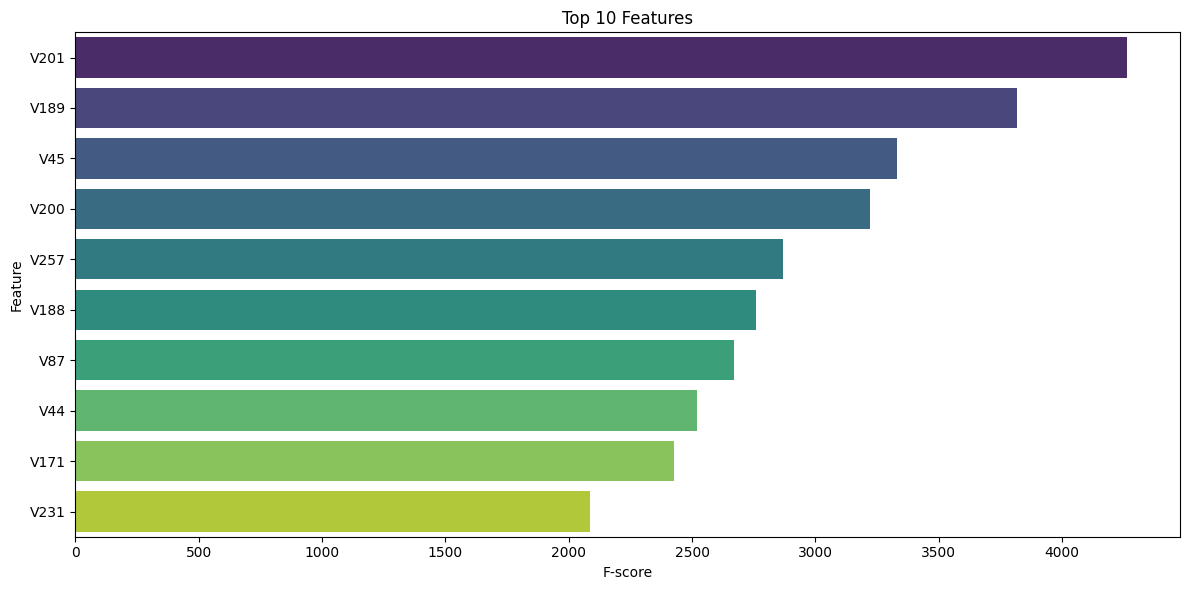

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

X = train.drop(["isFraud", "TransactionID"], axis=1)
y = train["isFraud"]
selector = SelectKBest(score_func=f_classif, k='all')  #all scores
selector.fit(X, y)

# Get feature scores
anova_scores = selector.scores_
anova_pvalues = selector.pvalues_

anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F_score': anova_scores,
    'p_value': anova_pvalues
})

# Sort features by F-score (descending)
anova_results = anova_results.sort_values(by='F_score', ascending=False)

print(anova_results.head(10))
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)


anova_scores = pd.DataFrame({
    "Feature": X.columns,
    "F_Score": anova_selector.scores_
})


anova_scores_sorted = anova_scores.sort_values(by="F_Score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=anova_scores_sorted.head(10), x="F_Score", y="Feature", palette="viridis")
plt.title("Top 10 Features")
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



# Model Implementation  - Random Forest Classifier



In [ ]:
X_train = train.drop(columns=['isFraud'])
y_train = train['isFraud']
X_test = test.drop(columns=['TransactionID'])

In [ ]:
missing_cols = set(X_train.columns) - set(X_test.columns)
extra_cols = set(X_test.columns) - set(X_train.columns)

# Convert the set to a list
X_test_missing = pd.DataFrame(0, index=X_test.index, columns=list(missing_cols))

# Concatenate the missing columns to X_test
X_test = pd.concat([X_test, X_test_missing], axis=1)

# Drop the extra columns that are not in X_train
X_test.drop(columns=extra_cols, inplace=True)

# Reorder X_test columns to match X_train
X_test = X_test[X_train.columns]

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_split, y_train_split)
y_pred = rf_clf.predict(X_val_split)
y_pred_prob = rf_clf.predict_proba(X_val_split)[:, 1]
accuracy = accuracy_score(y_val_split, y_pred)

In [ ]:
print("Accuracy:", accuracy_score(y_val_split, y_pred))
print("\nClassification Report:\n", classification_report(y_val_split, y_pred))


Accuracy: 0.9823492330321496

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     13878
           1       0.97      0.38      0.55       399

    accuracy                           0.98     14277
   macro avg       0.98      0.69      0.77     14277
weighted avg       0.98      0.98      0.98     14277



In [ ]:
y_test_pred = rf_clf.predict(X_test)
y_test_prob = rf_clf.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    "TransactionID": test["TransactionID"],
    "isFraud": y_test_prob
})


submission.to_csv("random_forest_submission.csv", index=False)
print(submission.head())

   TransactionID  isFraud
0        3663549     0.12
1        3663550     0.13
2        3663551     0.14
3        3663552     0.18
4        3663553     0.14
